<center>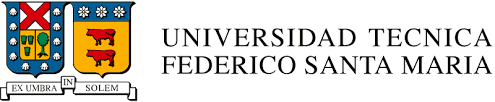</center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Clasificación de Sentimiento de Reviews de peliculas
 * Logistic regression y Naive Bayes
 * Una red neuronal feedforward
 * Una red neuronal recurrente (simple y LSTM).
 * Una red neuronal recurrente con embedding GLOVE (avanzado).
* AutoEncoders (AE)
 * AutoEncoder Convolutcional
 * Denoising AutoEncoders (DAE)
 * Detección de anomalías


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 3]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 09 de Diciembre, en horario de clases.
* Fecha de entrega: 10 de Diciembre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

In [ ]:
import numpy as np
import pickle
from keras.datasets import imdb
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Dropout, Flatten
from keras.initializers import Constant

# 1.- Clasificación de sentimientos

En esta tarea realizaremos clasificación de sentimientos sobre reviews de [IMDB](https://www.imdb.com/). Utilizaremos los modelos:

* Logistic regression y Naive Bayes
* Una red neuronal feedforward
* Una red neuronal recurrente (simple y LSTM).
* Una red neuronal recurrente con embedding GLOVE.
 
Su trabajo será implementar cada uno de los modelos y estudiar las performance de cada modelo.

## 1.0 Carga de datos y visualización

### Cargar datos

Primero, carguemos en memoria el conjunto de datos y veamos algunos de sus datos. ¿Qué puede decir de la base de datos?, ¿Es una tarea sencilla de realizar para una persona?, ¿Le parece que los datos de entrenamiento y de test están bien balanceados?

In [ ]:
classes = ['negative', 'positive']
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [ ]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

### Información datos

Número de palabras únicas en todo el dataset

In [ ]:
print("número de palabras: ")
print(len(np.unique(np.hstack(X))))

número de palabras: 
88585


La cantidad de caracteres varía entre cada reseña

In [ ]:
print_n = 5
for k in range(print_n):
    print('Cantidad caracter: ', len(X_train[k]))

Cantidad caracter:  218
Cantidad caracter:  189
Cantidad caracter:  141
Cantidad caracter:  550
Cantidad caracter:  147


In [ ]:
print_n = 2
for k in range(print_n):
    print('Sentiment: {0}'.format(classes[y_train[k]]))
    print('Text: ')
    print(X_train[k])     

Sentiment: positive
Text: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sentiment

### Balance clases

Se tiene la misma cantidad de datos para entrenamiento y testeo

In [ ]:
print("Cantidad datos entrenamiento: ",len(X_train))
print("Cantidad datos test: ",len(X_test))

Cantidad datos entrenamiento:  25000
Cantidad datos test:  25000


**Entrenamiento**

Balance de clases del dataset entrenamiento

In [ ]:
print(pd.Index(y_train).value_counts())

1    12500
0    12500
dtype: int64


In [ ]:
print('Per class count:')
clases=[]
count=[]
for cls, n in zip(*np.unique(y_train, return_counts=True)):
    print(f'{cls}: {n} ({(n/float(len(y_train)))*100:.2f}%)')
    clases.append(cls)
    count.append((n/float(len(y_train)))*100)

Per class count:
0: 12500 (50.00%)
1: 12500 (50.00%)


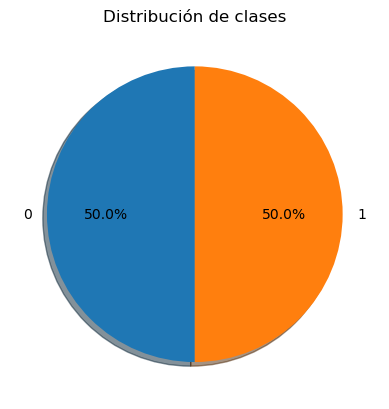

In [ ]:
fig1, ax1 = plt.subplots()
plt.title("Distribución de clases")
ax1.pie(count, labels=clases, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

**Testeo**

balance de dataset de testeo

In [ ]:
print(pd.Index(y_test).value_counts())

0    12500
1    12500
dtype: int64


In [ ]:
print('Per class count:')
clases=[]
count=[]
for cls, n in zip(*np.unique(y_test, return_counts=True)):
    print(f'{cls}: {n} ({(n/float(len(y_test)))*100:.2f}%)')
    clases.append(cls)
    count.append((n/float(len(y_test)))*100)

Per class count:
0: 12500 (50.00%)
1: 12500 (50.00%)


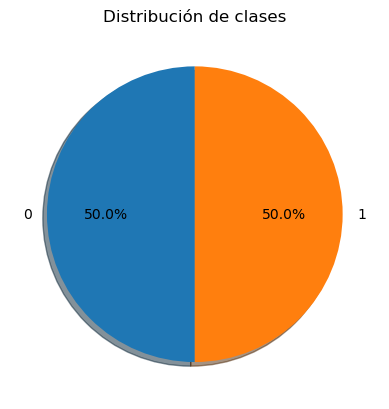

In [ ]:
fig1, ax1 = plt.subplots()
plt.title("Distribución de clases")
ax1.pie(count, labels=clases, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

### Preguntas
El dataset es un conjunto de listas que referencian palabras de un diccionario, esta a su vez representan frases que indican un sentimiento respecto a una pelicula, estos sentimientos se miden de forma binaria (un comentario positivo o negativo respecto a la pelicula). Esta tarea si puede ser realizada por un humano, ya que este puede tener un mejor entendimiento de la intensionalidad del autor del comentario.

El dataset está compuesto por 50000 comentarios los cuales se distribuyen de forma equitativa en los datasets que se usaran para trabajar con las redes. De los diagramas antes mostrados, se puede apreciar como tanto el dataset de testeo como el de entrenamiento estan balanceados, teniendo ambos la misma cantidad de archivos para outcomes negativos y positivos.

## 1.a - Modelos clásicos y representación de datos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

En esta sección preprocese el texto, para esto utilice las clases CountVectorizer y TfidfVectorizer debe obtener dos representaciones vectoriales (bag of words y tf-idf) para cada uno de los ejemplos del dataset.

In [ ]:
X_train = [' '.join(map(str, row)) for row in X_train]
X_test = [' '.join(map(str, row)) for row in X_test]

In [ ]:
X_train[0]

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 22665 9 35 480 284 5 150 4 172 112 167 21631 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 19193 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 10311 8 4 107 117 5952 15 256 4 31050 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 12118 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [ ]:
vectorizer_bgw = CountVectorizer()
vectorizer_tf = TfidfVectorizer()


# Vectorizar datos de entrenamiento con ambos metodos
# Bag of words
vectorizer_bgw.fit(X_train)

# Matriz Tf-idf
vectorizer_tf.fit(X_train)


X_train_bgw = vectorizer_bgw.transform(X_train)
X_train_tf = vectorizer_tf.transform(X_train)

X_test_bgw = vectorizer_bgw.transform(X_test)
X_test_tf = vectorizer_tf.transform(X_test)
#####################################################

print("Atributos CountVectorizer: ", X_train_bgw.shape[1])
print("Atributos TfidfVectorizer: ", X_train_tf.shape[1])

Atributos CountVectorizer:  88577
Atributos TfidfVectorizer:  88577


CountVectorizer realiza un conteo por palabra->token utilizando el vocabulario obtenido con fit. 

El objetivo de utilizar tf-idf en lugar de las frecuencias brutas de ocurrencia de una palabra en un documento determinado es reducir el impacto de las palabras que se producen con mucha frecuencia en un corpus determinado y que, por lo tanto, empíricamente son menos informativas que las características que se producen en una pequeña fracción del corpus de formación. La formula para calcular la matriz tf-idf es:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \cdotp \text{idf}(t)$$

Donde $\text{tf}(t,d)$ es la ocurrencia de un termino $t$ en un documento $d$.

$$\text{idf}(t) = \log [ (1 + n) / (1 + df(t)) ] + 1$$

Donde $df(t)$ es el número de documentos del conjunto de documentos que contienen el término t.

Por lo tanto TfidfVectorizer es simplemente aplicar la transformación Tf-idf al CountVectorizer.

## 1.b - Logistic regression y Naive Bayes
En esta sección entrene los modelos MultinomialNB y LogisticRegression en los datos preprocesados obtenidos anteriormente, utilizando ambas representaciones cuando sea posible (es decir, para LR y NB tendrá que entrenar dos modelos por ejemplo, uno para cada representación). ¿Cuáles son las principales características y parámetros de cada modelo?, ¿Qué significa que los datos sean o no sean linealmente separables?.

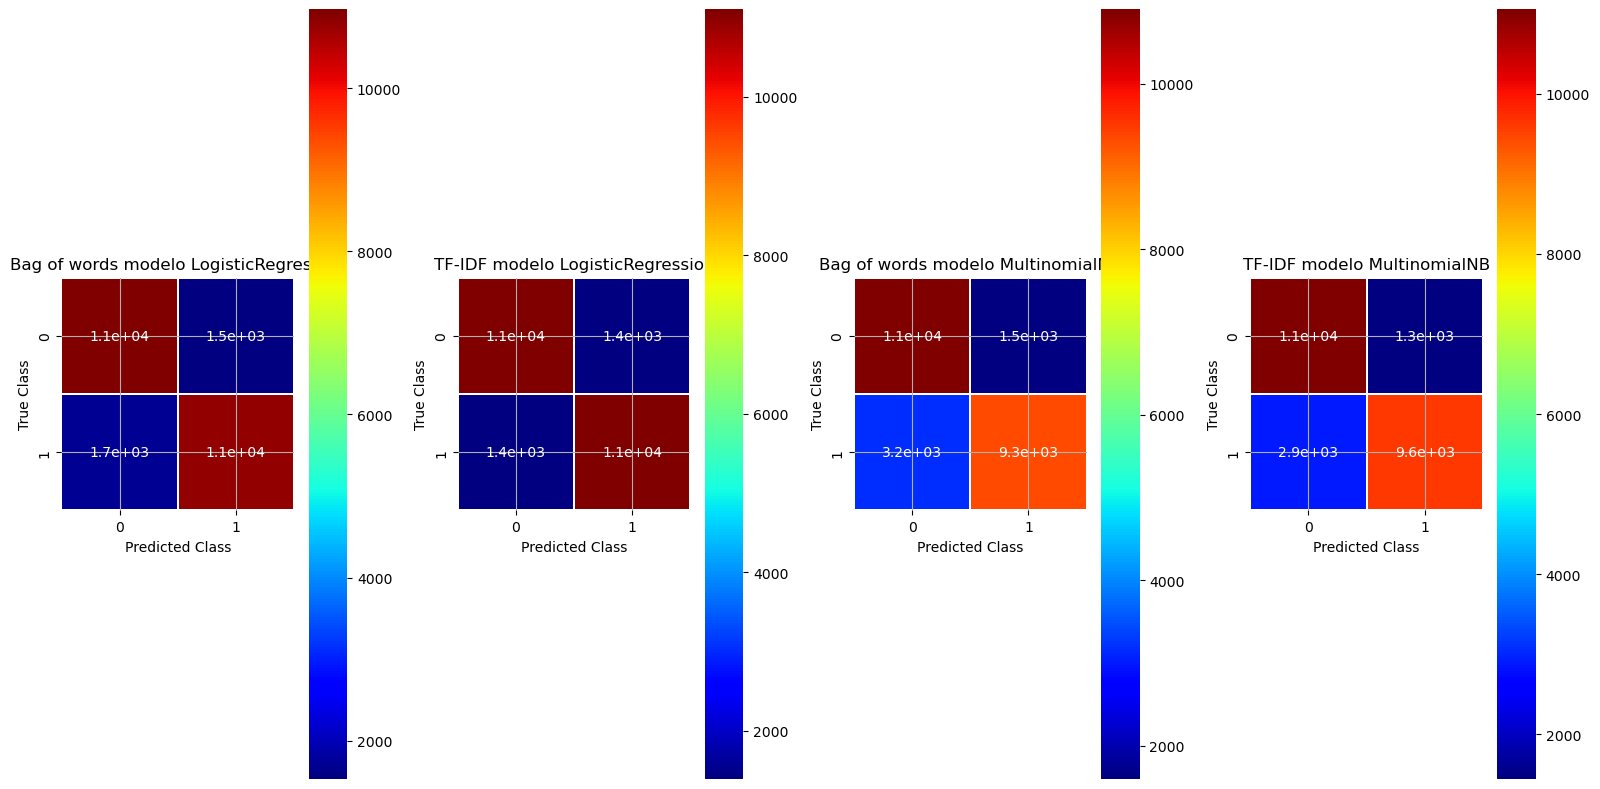


################# Modelo LogisticRegression Bag of words #################

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

###################################################

################# Modelo LogisticRegression TF-IDF #################

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

###################################################

################# Modelo MultinomialNB Bag of words #################

              precisio

In [ ]:
def modelo(clf, X_train, y_train, X_test, y_test):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return y_pred, classification_report(y_test, y_pred)
   

plt.rcParams["figure.figsize"]=[16,8]

clf = [LogisticRegression(max_iter=10000), MultinomialNB(), None, None]
datos = ['Bag of words', 'TF-IDF']
models = ['LogisticRegression', 'MultinomialNB']
tr_sets = [X_train_bgw, X_train_tf]
test_sets = [X_test_bgw, X_test_tf]
reportes = list()

k=1
for cl in range(len(clf)):
                      
    y_pred, reporte = modelo(clf[int(cl/2)], tr_sets[int(cl%2)], y_train, test_sets[int(cl%2)], y_test) 
    
    reportes.append(reporte)       
    
    ax = plt.subplot(1,4,k)

    sns.heatmap(np.around(confusion_matrix(y_test, y_pred), decimals=2), robust=True, linewidths=0.1, square=True,annot=True,cmap='jet',linecolor="white", ax=ax, cbar=True);
    ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class');False
    ax.set_title(f'{datos[int(cl%2)]} modelo {models[int(cl/2)]}');

    plt.tight_layout()
    plt.grid()
    if k==4:
        k=1
        plt.show()
    else:
        k+=1

for r in range(len(reportes)):
    print(f"\n################# Modelo {models[int(r/2)]} {datos[int(r%2)]} #################\n")
    print(reportes[r])
    print(f"###################################################")

### Preguntas

 1. ¿Cuáles son las principales características y parámetros de cada modelo?

  MultinomialNB: Los parametros definidos, en la libreria sklearn, son uno de smoothing, un parametro binario en caso de que queramos que el modelo pueda aprender probabilidades apriori de la clase y finalmente un parametro en donde ingresamos la distribucion apriori de la clase.
  Este modelo se utiliza para la clasificacion con caracteristicas discretas

  LogisticRegression: Los parametros definidos, en la libreria sklearn, son muchos, por lo que solo nombraremos los mas relevantes, uno es donde se define la norma de penalización, el peso de la penalizacion, otro donde se define el solver para el problema de minimización, otros parametros son la tolerancia .
  Este tipo de modelos se utiliza la clasificacion en categorias

 2. ¿Qué significa que los datos sean o no sean linealmente separables?.

  Se dice que un conjunto de datos son linealmente separables si es que existe un hiperplano que los puede separar perfectamente en sus respectivas clases.

 3. ¿Qué representación es mejor en cada modelo?
 
 Para poder decidir que representación es mejor que otra, nos centraremos en un aspecto del grafico anterior, la diagonal. La diagonal nos indica la cantidad de aciertos del modelo utilizando cada representación, por lo tanto es un metrica valida para poder decidir que representación es mejor.
  
  Para ambos modelos la representación TF-IDF ofrece una mejor precisión.


## 1.c - Modelos de redes neuronales

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, SimpleRNN, Add, Lambda, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [ ]:
# Definición de parámetros
batch_size = 32
epochs = 2
num_classes = 1 # Positivo o negativo, pero para la capa de salida es 1 neurona sigmoide
max_words = 70
embedding_size = 30

### Preprocesamiento
A continuación preprocesaremos los datos, realizando tokenización.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizing text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train + X_test)
word_index = tokenizer.word_index
num_words = len(tokenizer.word_index) + 1

In [ ]:
# Transformando texto a secuencias de indices
X_tr = tokenizer.texts_to_sequences(X_train)
X_te = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Se agregan 0 a textos que tienen menos de max_words palabras y se cortan los que tienen mas
X_tr_pad = pad_sequences(X_tr, maxlen=max_words)
X_te_pad = pad_sequences(X_te, maxlen=max_words)

# Se convierten label a version categorica
#y_trainc = to_categorical(y_train, num_classes=num_classes+1)
#y_testc = to_categorical(y_test, num_classes=num_classes+1)
y_trainc = y_train
y_testc = y_test

## 1.d -  Red Neuronal FeedFordward

Primero entrenaremos una red neuronal feedforward directamente en el texto tokenizado, utilizando un embedding simple.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)
# Sumando los embedding
embedding = Lambda(lambda x: K.sum(x, axis=1), 
                   output_shape=(embedding_size,))(embedding)
# Aplicando una capa densa en la suma
dense = Dense(20, activation='relu')(embedding)

output = Dense(num_classes, activation='sigmoid')(dense)

# Construyendo el modelo
model_rnn = Model(inputs=[document_input], outputs=[output])
model_rnn.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])


In [ ]:
# Entrenando el modelo
history_rnn =model_rnn.fit( X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 28s 43ms/step - loss: 0.4320 - accuracy: 0.7957 - val_loss: 0.3724 - val_accuracy: 0.8296
Epoch 2/2
625/625 [==============================] - 22s 36ms/step - loss: 0.2000 - accuracy: 0.9207 - val_loss: 0.4292 - val_accuracy: 0.8214


In [ ]:
loss, acc = model_rnn.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 2s 2ms/step - loss: 0.4645 - accuracy: 0.8088
Accuracy en datos de test: 0.8087599873542786


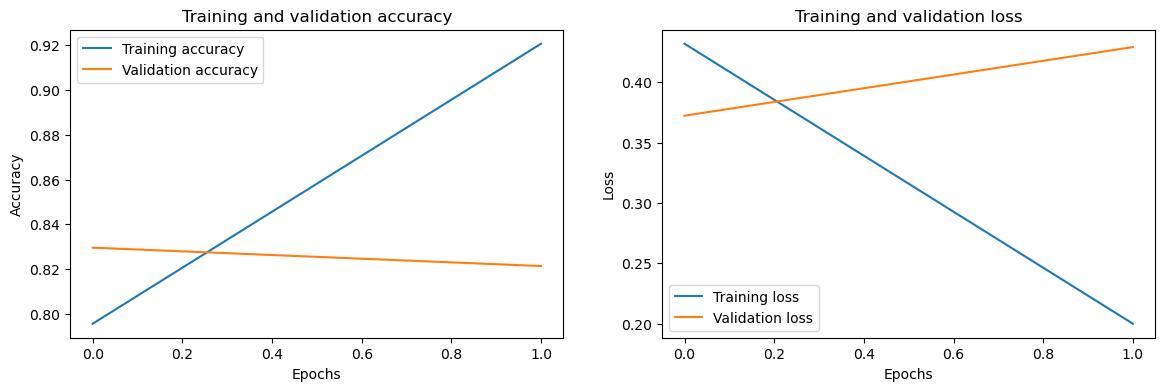

In [ ]:
plt.rcParams["figure.figsize"]=[14,4]
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label="Training accuracy")
plt.plot(history_rnn.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label="Training loss")
plt.plot(history_rnn.history['val_loss'], label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Red Neuronal Recurrente Simple con Embedding

Explique cómo funcionan las redes recurrentes e investigue qué es y cómo usar el embedding y la librería `SimpleRNN`.

Reemplace la suma de embedding y la capa densa por una red SimpleRNN con 10 unidades, utilice return_sequence=False.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)

rnn = SimpleRNN(units=10, activation='tanh', return_sequences=False)(embedding)

# Aplicando una capa densa luego de la RNN
output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model_rnn_e = Model(inputs=[document_input], outputs=[output])
model_rnn_e.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history_rnn_e = model_rnn_e.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 51s 79ms/step - loss: 0.4743 - accuracy: 0.7762 - val_loss: 0.4208 - val_accuracy: 0.8122
Epoch 2/2
625/625 [==============================] - 50s 80ms/step - loss: 0.2490 - accuracy: 0.9058 - val_loss: 0.4413 - val_accuracy: 0.8068


In [ ]:
loss, acc = model_rnn_e.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 8s 11ms/step - loss: 0.4471 - accuracy: 0.8096
Accuracy en datos de test: 0.8095600008964539


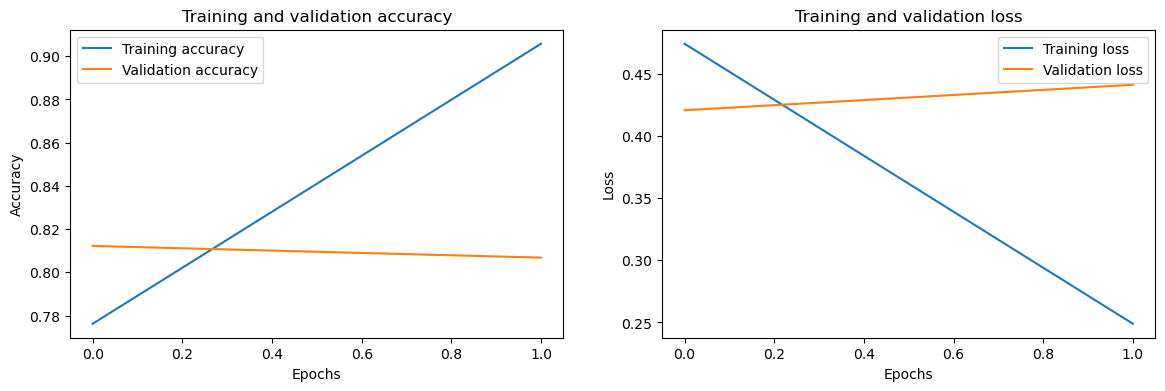

In [ ]:
plt.rcParams["figure.figsize"]=[14,4]
plt.subplot(1, 2, 1)
plt.plot(history_rnn_e.history['accuracy'], label="Training accuracy")
plt.plot(history_rnn_e.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn_e.history['loss'], label="Training loss")
plt.plot(history_rnn_e.history['val_loss'], label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Dropout

Aplique un dropout de 0.4 luego de la capa RNN para evitar el sobre ajuste. Averigue sobre Dropout y explique como funciona en este tipo de redes.

In [ ]:
dropout=[0.4,0.8]

In [ ]:
history_dropout=[]
for d in dropout:
    document_input = Input(shape=(max_words, ), dtype='int32')
    # Embedding Layer
    embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)
    rnn = SimpleRNN(units=10, activation='tanh', return_sequences=False, dropout=d)(embedding)
    # Aplicando una capa densa luego de la RNN
    output = Dense(num_classes, activation='sigmoid')(rnn)
    
    # Construyendo el modelo
    model_dropout = Model(inputs=[document_input], outputs=[output])
    model_dropout.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
    # Entrenando el modelo
    history_dropout.append(model_dropout.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2))
    print("=======================================")
    print("Dropout: ",  d, "\n")
    loss, acc = model_dropout.evaluate(X_te_pad, y_testc)
    print('Accuracy en datos de test: {0}'.format(acc))

Epoch 1/2
625/625 [==============================] - 48s 75ms/step - loss: 0.5826 - accuracy: 0.6834 - val_loss: 0.4701 - val_accuracy: 0.7894
Epoch 2/2
625/625 [==============================] - 57s 92ms/step - loss: 0.3598 - accuracy: 0.8504 - val_loss: 0.4146 - val_accuracy: 0.8102
Dropout:  0.4 

782/782 [==============================] - 11s 14ms/step - loss: 0.4125 - accuracy: 0.8145
Accuracy en datos de test: 0.8144800066947937
Epoch 1/2
625/625 [==============================] - 59s 87ms/step - loss: 0.6177 - accuracy: 0.6492 - val_loss: 0.4733 - val_accuracy: 0.7800
Epoch 2/2
625/625 [==============================] - 52s 84ms/step - loss: 0.4457 - accuracy: 0.8016 - val_loss: 0.4309 - val_accuracy: 0.8082
Dropout:  0.8 

782/782 [==============================] - 9s 11ms/step - loss: 0.4325 - accuracy: 0.8070
Accuracy en datos de test: 0.8069599866867065


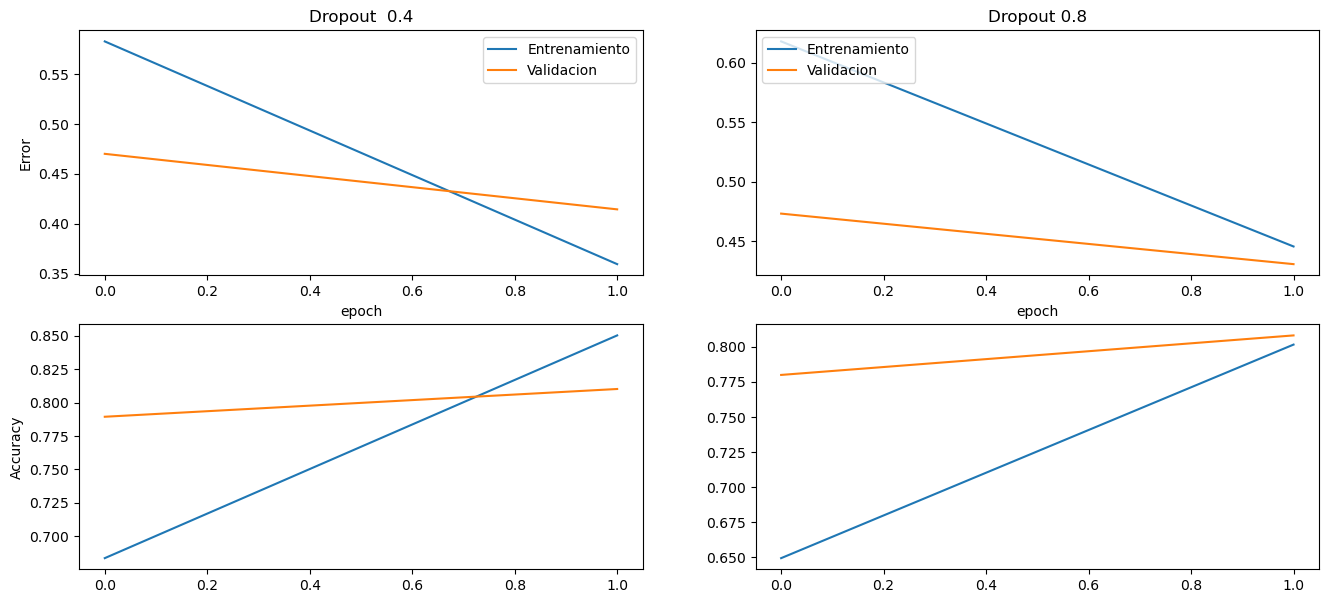

In [ ]:
title = ["Dropout  0.4", "Dropout 0.8"]

fig, ax = plt.subplots(2, 2, figsize=(16,7),)

for i in range(2):
    ax[0,i].plot(range(epochs),  history_dropout[i].history['loss'])
    ax[0,i].plot(range(epochs),  history_dropout[i].history['val_loss'])
    ax[1,i].plot(range(epochs),  history_dropout[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(epochs), history_dropout[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i].set_title(str(title[i]))
    ax[0,i].set_xlabel("epoch")

ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

### Preguntas


En las graficas se puede apreciar los efectos de aplicar la capa de dropout, sin ella, la funcion de perdida empezaba a aumentar levemente a medida que aumentabamos el numero de epocas y por consiguiente, la precision de la red disminuia.

1. Explique cómo funcionan las redes recurrentes e investigue qué es y cómo usar el embedding y la librería SimpleRNN.
  
  Las redes recurrentes funcionan de un modo similar a las feed-forward pero se ingresar elementos importantes, el primero de ellos es que la red es aplicada a un secuencia cuyos elementos estan relacionados "temporalmente", esto quiere decir que la red no puede ir y ejecutar la tarea, tiene que "recordar" lo que hizo en el paso anterior. Este elemento de memoria hace de este tipo de redes  sean tan especiales.
  Word embedding es un termino que engrobla formas de modelar el lenguaje y palabras de una forma vectorizada.
  La clase SimpleRNN implementa un red neuronal recurrente complemente conectada, donde el output es ingresado como input. Para usar esta clase, hay que importarlo desde la libreria keras.


2. Averigue sobre Dropout y explique como funciona en este tipo de redes.

  La capa de dropout originalmente fue pensada para desactivar neuronas de forma aleatoria, luego a volver los pesos 0 en vez de desactivar neuronas, el problema es que esto fue pensado para redes feed-forward, no para RNN. Frente a esto y para no afectar la capacidad de memorización de la RNN, la acción del dropout solo se aplica a conexiones no recurrentes.



## 1.e - Red LSTM con Embedding

Explique qué es y para qué tareas se utilizan las LSTM, explique para qué es cada compuerta de una neurona de este tipo.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)

rnn = LSTM(units=10, activation='tanh', return_sequences=False, dropout=0.8, recurrent_dropout=0.8)(embedding)

output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model_lstm = Model(inputs=[document_input], outputs=[output])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history_lstm = model_lstm.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 94s 143ms/step - loss: 0.5989 - accuracy: 0.6777 - val_loss: 0.4866 - val_accuracy: 0.7780
Epoch 2/2
625/625 [==============================] - 85s 136ms/step - loss: 0.4354 - accuracy: 0.8088 - val_loss: 0.4368 - val_accuracy: 0.8156


In [ ]:
loss, acc = model_lstm.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 18s 23ms/step - loss: 0.4407 - accuracy: 0.8151
Accuracy en datos de test: 0.8151199817657471


Grafique las curvas de error para los datos de entrenamiento, validación y test para el último modelo, concluya sobre estas.

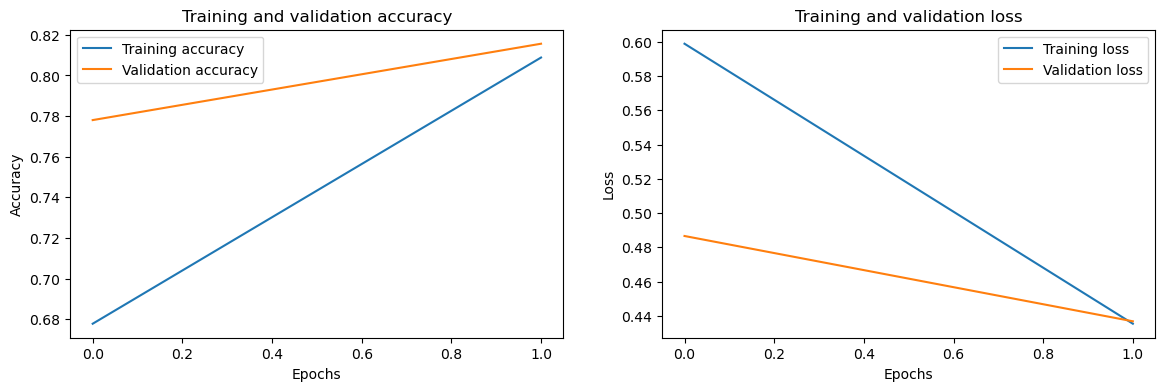

In [ ]:
# Loss
plt.rcParams["figure.figsize"]=[14,4]
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label="Training accuracy")
plt.plot(history_lstm.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label="Training loss")
plt.plot(history_lstm.history['val_loss'], label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

En la grafica anetior podemos ver un mejor rendimiento que en el inciso anterior, donde la red muestra una pendiente de convergencia mas acentuada, alcanzando un valor de 0.8 de presicion, mientras que la funcion de perdida se mantiene algo alta (alrededor de 0.44)

### Preguntas

1. Explique qué es y para qué tareas se utilizan las LSTM, explique para qué es cada compuerta de una neurona de este tipo.

  Las LSTM corresponden a un tipo de redes recurrentes, donde su principal caracteristicas es su memoria a largo plazo, este tipo de redes son usadas en problemas de prediccion/clasificación relacionadas a series de tiempo. Estas redes estan compuestas de 4 compuertas, la de entrada, de salida, de memoria y de olvido. La compuerta de entrada recibe el nuevo input y decide que parte de este va a modificar la memoria, la compuerta de  de olvido decide que parte de lo almacenado en la memoria es descartado, la compuerta de salida es el resultado del resultado de aprendizaje considerando los nuevos outputs y lo almacenado en la memoria.

2.  Describa brevemente en qué consiste el embedding GLOVE, en qué casos es conveniente y cómo usarlo.

  Corresponde a un algoritmo de aprendizaje no supervizado que permite vectorizar palabras tomando en consideración estadistica local y global de las palabras, permitiendo obtener mejores representaciones. Es util utilizarlo cuando se quiere realizar estudio de texto buscando similitudes entre ellos. Para utilizar este algoritmo es necesario poblar la matriz de relacion entre palabras, ya que, por su implementacion esta esta vacia. 

## 1.f -  Red LSTM con GLOVE embedding

Descargue los embeddings pre entrenados desde https://nlp.stanford.edu/projects/glove/
archivo glove.6B.zip y extraiga los datos para utilizarlos en esta sección. Describa brevemente en qué consiste el embedding GLOVE, en qué casos es conveniente y cómo usarlo.

In [ ]:
# Funciones para cargar los vectores GLOVE
def glorot_uniform_np(shape):
    fan_in, fan_out = shape[0],shape[1]
    s = np.sqrt(6. / (fan_in + fan_out))
    return np.random.uniform(-s, s, size=shape)

def load_word_vectors(embeddings_index, glove_file):
    print('Indexing word vectors.')
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    glove_file.close()
    print('Found %s word vectors.' % len(embeddings_index))    



In [ ]:
# Cargando los vectores GLOVE
## LOAD PRETRAINED WORD VECTORS
GLOVE_FILE = 'glove.6B/glove.6B.100d.txt'
embeddings_index = {}
glove_file = open(GLOVE_FILE,  encoding="utf8")
                  
load_word_vectors(embeddings_index, glove_file) 
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embeddings_index = {}

Indexing word vectors.
Found 400000 word vectors.


Modifique la capa Embedding para utilizar los embedding pre-entrenados, para esto utilice el argumento embeddings_initializer con el valor Constant(embedding_matrix). Entrene con GLOVE embedding y el mejor modelo que haya obtenido hasta el momento o si desea puede probar modificandolo, por ejemplo agregando capas de LSTM, Dropout, Densa, ..., sientase libre de experimentar y mejorar sus resultados.

### LSTM

En primer lugar, se entrena la red con el mejor modelo obtenido hasta el momento, el cual es el modelo LSTM utilizado en la pregunta anterior

In [ ]:
embedding_size = 100
history_glove =[]

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')

# Embedding Layer
embedding = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_size, 
                      input_length=max_words, 
                      embeddings_initializer = Constant(embedding_matrix),
                      trainable=True)(document_input)

rnn = LSTM(units=10, activation='tanh', return_sequences=False, dropout=0.8, recurrent_dropout=0.8)(embedding)

output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model_glove = Model(inputs=[document_input], outputs=[output])
model_glove.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history_glove.append(model_glove.fit(X_tr_pad, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2))

Epoch 1/2
625/625 [==============================] - 188s 291ms/step - loss: 0.6954 - accuracy: 0.5161 - val_loss: 0.6796 - val_accuracy: 0.5680
Epoch 2/2
625/625 [==============================] - 175s 280ms/step - loss: 0.6760 - accuracy: 0.5764 - val_loss: 0.5785 - val_accuracy: 0.7374


In [ ]:
loss, acc = model_glove.evaluate(X_te_pad, y_test)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 21s 27ms/step - loss: 0.5773 - accuracy: 0.7386
Accuracy en datos de test: 0.7386400103569031


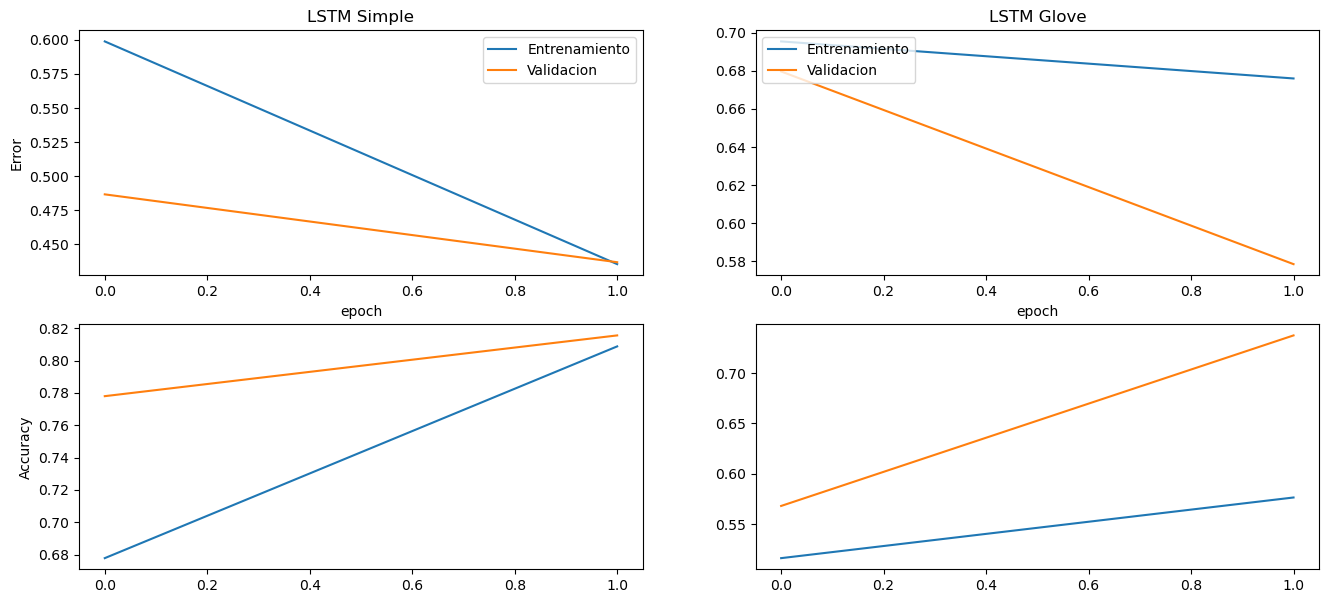

In [ ]:
title = ["LSTM Simple", "LSTM Glove"]

fig, ax = plt.subplots(2, 2, figsize=(16,7),)

# Simple

ax[0,0].plot(range(epochs),  history_lstm.history['loss'])
ax[0,0].plot(range(epochs),  history_lstm.history['val_loss'])
ax[1,0].plot(range(epochs),  history_lstm.history['accuracy'], label ="Training accuracy" )
ax[1,0].plot(range(epochs), history_lstm.history['val_accuracy'], label ="Validation accuracy" )
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[0,0].set_title(str(title[0]))
ax[0,0].set_xlabel("epoch")

# Glove
ax[0,1].plot(range(epochs),  history_glove[0].history['loss'])
ax[0,1].plot(range(epochs),  history_glove[0].history['val_loss'])
ax[1,1].plot(range(epochs),  history_glove[0].history['accuracy'], label ="Training accuracy" )
ax[1,1].plot(range(epochs), history_glove[0].history['val_accuracy'], label ="Validation accuracy" )
ax[0,1].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[0,1].set_title(str(title[1]))
ax[0,1].set_xlabel("epoch")


ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

### Dropout

Luego se prueban distintos valores de dropout la misma red anterior

In [ ]:
def lstm_dropout(dr):
    document_input = Input(shape=(max_words, ), dtype='int32')
    # Embedding Layer
    embedding = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_size, 
                      input_length=max_words, 
                      embeddings_initializer = Constant(embedding_matrix),
                      trainable=True)(document_input)
    rnn = LSTM(units=10, activation='tanh', return_sequences=False, dropout=dr, recurrent_dropout=dr)(embedding)
    output = Dense(num_classes, activation='sigmoid')(rnn)
    # Construyendo el model
    model = Model(inputs=[document_input], outputs=[output])
    return model

In [ ]:
dropout =[0.2, 0.4, 0.6 ,0.9]
history_glove_dr =[]
for i in dropout:
    model_glove_dr = lstm_dropout(i)
    model_glove_dr.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
    # Entrenando el modelo
    history_glove_dr.append(model_glove_dr.fit(X_tr_pad, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2))
    print("=======================================")
    print("Dropout: ", i, "\n")
    loss, acc = model_glove_dr.evaluate(X_te_pad, y_test)
    print('Accuracy en datos de test: {0}'.format(acc))
    print("=======================================")

Epoch 1/2
625/625 [==============================] - 95s 147ms/step - loss: 0.5512 - accuracy: 0.7049 - val_loss: 0.3977 - val_accuracy: 0.8294
Epoch 2/2
625/625 [==============================] - 92s 147ms/step - loss: 0.2651 - accuracy: 0.8985 - val_loss: 0.4114 - val_accuracy: 0.8234
Dropout:  0.2 

782/782 [==============================] - 12s 16ms/step - loss: 0.4332 - accuracy: 0.8100
Accuracy en datos de test: 0.8100399971008301
Epoch 1/2
625/625 [==============================] - 93s 145ms/step - loss: 0.5939 - accuracy: 0.6589 - val_loss: 0.4142 - val_accuracy: 0.8170
Epoch 2/2
625/625 [==============================] - 95s 152ms/step - loss: 0.3229 - accuracy: 0.8684 - val_loss: 0.3928 - val_accuracy: 0.8306
Dropout:  0.4 

782/782 [==============================] - 13s 17ms/step - loss: 0.4216 - accuracy: 0.8203
Accuracy en datos de test: 0.8202800154685974
Epoch 1/2
625/625 [==============================] - 98s 152ms/step - loss: 0.6688 - accuracy: 0.5773 - val_loss: 0.53

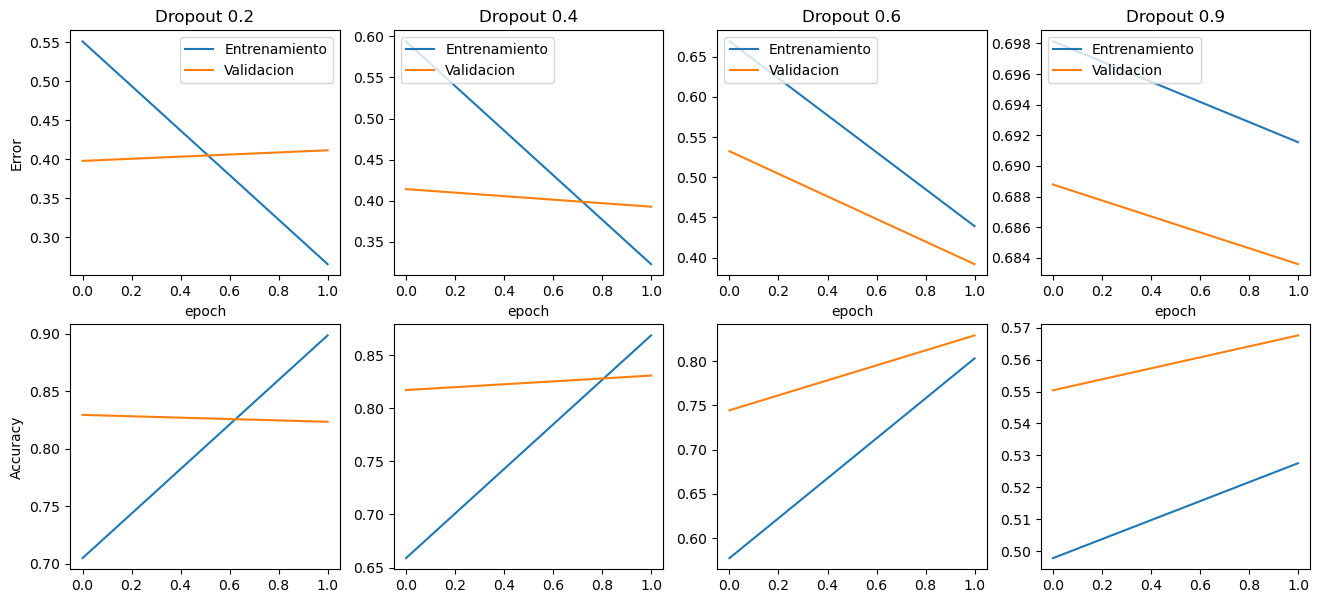

In [ ]:
title = ["Dropout 0.2", "Dropout 0.4", "Dropout 0.6", "Dropout 0.9"]

fig, ax = plt.subplots(2, 4, figsize=(16,7),)

for i in range(4):
    ax[0,i].plot(range(epochs),  history_glove_dr[i].history['loss'])
    ax[0,i].plot(range(epochs),  history_glove_dr[i].history['val_loss'])
    ax[1,i].plot(range(epochs),  history_glove_dr[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(epochs), history_glove_dr[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i].set_title(str(title[i]))
    ax[0,i].set_xlabel("epoch")

ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

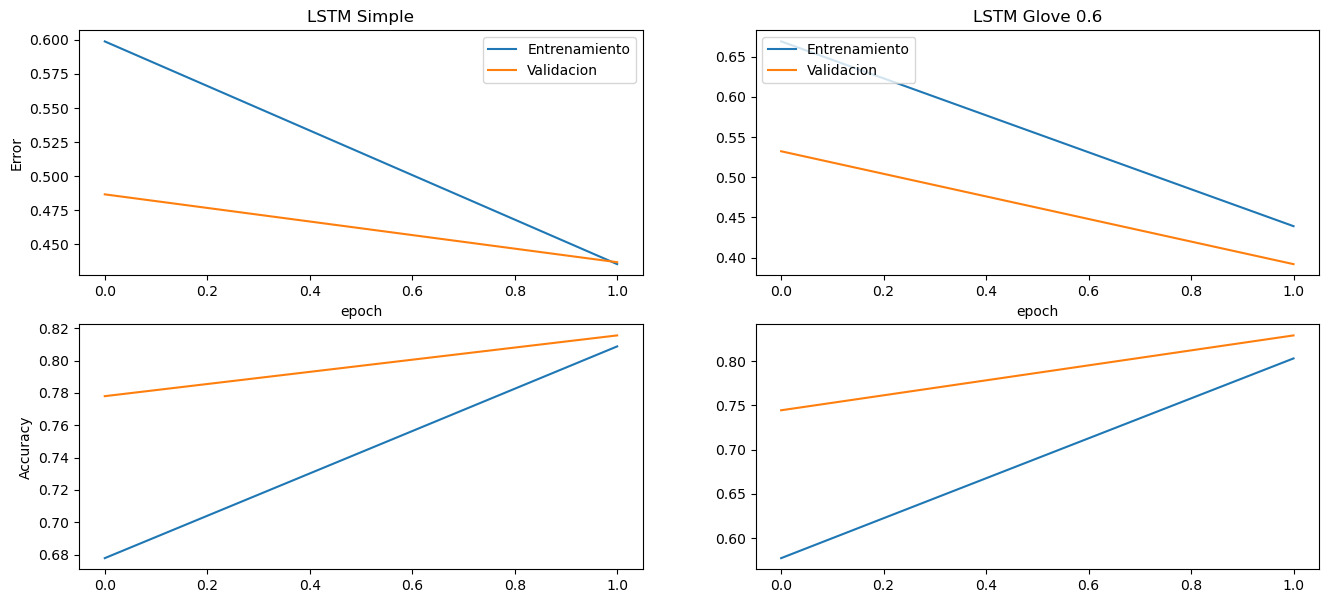

In [ ]:
title = ["LSTM Simple", "LSTM Glove 0.6"]

fig, ax = plt.subplots(2, 2, figsize=(16,7),)

# Simple

ax[0,0].plot(range(epochs),  history_lstm.history['loss'])
ax[0,0].plot(range(epochs),  history_lstm.history['val_loss'])
ax[1,0].plot(range(epochs),  history_lstm.history['accuracy'], label ="Training accuracy" )
ax[1,0].plot(range(epochs), history_lstm.history['val_accuracy'], label ="Validation accuracy" )
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[0,0].set_title(str(title[0]))
ax[0,0].set_xlabel("epoch")

# Glove
ax[0,1].plot(range(epochs),  history_glove_dr[2].history['loss'])
ax[0,1].plot(range(epochs),  history_glove_dr[2].history['val_loss'])
ax[1,1].plot(range(epochs),  history_glove_dr[2].history['accuracy'], label ="Training accuracy" )
ax[1,1].plot(range(epochs), history_glove_dr[2].history['val_accuracy'], label ="Validation accuracy" )
ax[0,1].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[0,1].set_title(str(title[1]))
ax[0,1].set_xlabel("epoch")


ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

### Capas

Por útlimo se prueban añadiendo capas densas y capas lstm por separado

In [ ]:
def lstm_capas_densas():
    document_input = Input(shape=(max_words, ), dtype='int32')
    # Embedding Layer
    embedding = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_size, 
                      input_length=max_words, 
                      embeddings_initializer = Constant(embedding_matrix),
                      trainable=True)(document_input)
    rnn = LSTM(units=128, activation='tanh', return_sequences=False, dropout=0.6, recurrent_dropout=0.6)(embedding)
    rnn = Dense(10, activation='relu') (rnn)
    output = Dense(num_classes, activation='sigmoid')(rnn)
    # Construyendo el model
    model = Model(inputs=[document_input], outputs=[output])
    return model
def lstm_capas_lstm():
    document_input = Input(shape=(max_words, ), dtype='int32')
    # Embedding Layer
    embedding = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_size, 
                      input_length=max_words, 
                      embeddings_initializer = Constant(embedding_matrix),
                      trainable=True)(document_input)
    rnn = LSTM(units=128, activation='tanh', return_sequences=True, dropout=0.6, recurrent_dropout=0.6)(embedding)
    rnn = LSTM(units=64, activation='tanh', return_sequences=False, dropout=0.6, recurrent_dropout=0.6)(rnn)
    output = Dense(num_classes, activation='sigmoid')(rnn)
    # Construyendo el model
    model = Model(inputs=[document_input], outputs=[output])
    return model

In [ ]:
history_capas =[]
model_glove_capas = lstm_capas_densas()
model_glove_capas.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# Entrenando el modelo
history_capas.append(model_glove_capas.fit(X_tr_pad, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2))

loss, acc = model_glove_capas.evaluate(X_te_pad, y_test)
print('Accuracy en datos de test: {0}'.format(acc))
print("=======================================")

Epoch 1/2
625/625 [==============================] - 181s 285ms/step - loss: 0.6846 - accuracy: 0.5394 - val_loss: 0.5942 - val_accuracy: 0.7058
Epoch 2/2
782/782 [==============================] - 30s 38ms/step - loss: 0.3778 - accuracy: 0.8344
Accuracy en datos de test: 0.8343600034713745


In [ ]:
model_glove_capas = lstm_capas_lstm()
model_glove_capas.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# Entrenando el modelo
history_capas.append(model_glove_capas.fit(X_tr_pad, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2))

loss, acc = model_glove_capas.evaluate(X_te_pad, y_test)
print('Accuracy en datos de test: {0}'.format(acc))
print("=======================================")

Epoch 1/2
625/625 [==============================] - 261s 410ms/step - loss: 0.6282 - accuracy: 0.6198 - val_loss: 0.4569 - val_accuracy: 0.7878
Epoch 2/2
782/782 [==============================] - 49s 62ms/step - loss: 0.3860 - accuracy: 0.8268
Accuracy en datos de test: 0.8268399834632874


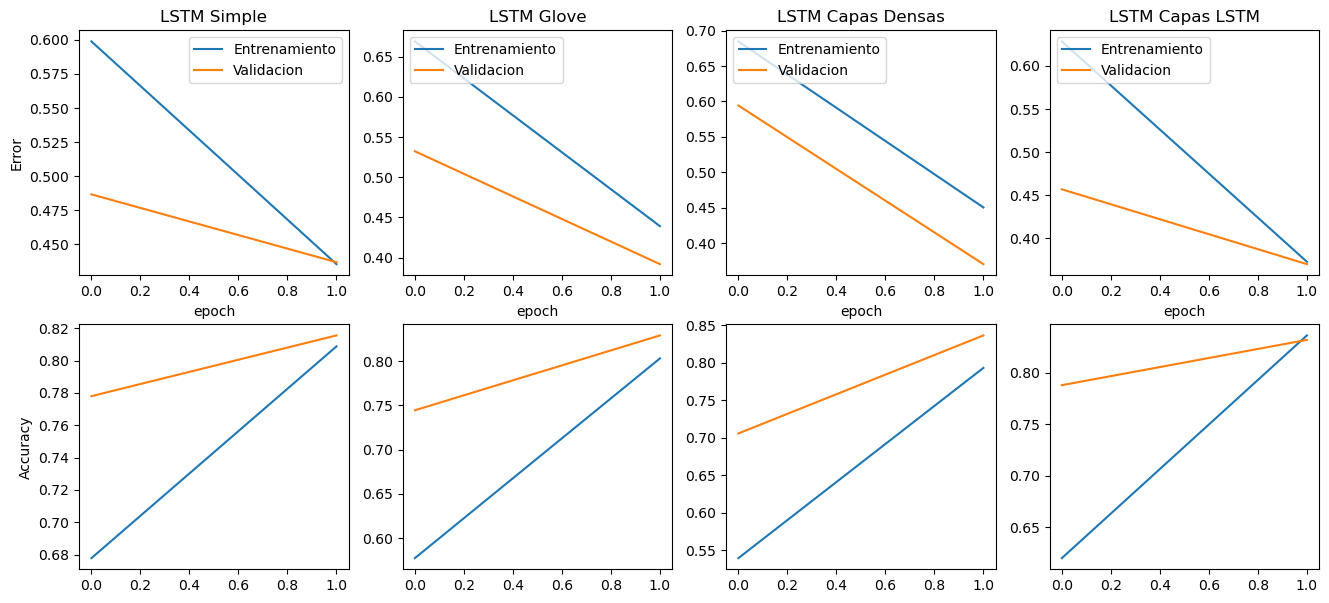

In [ ]:
title = ["LSTM Simple", "LSTM Glove","LSTM Capas Densas", "LSTM Capas LSTM"]

fig, ax = plt.subplots(2, 4, figsize=(16,7),)

# Simple

ax[0,0].plot(range(epochs),  history_lstm.history['loss'])
ax[0,0].plot(range(epochs),  history_lstm.history['val_loss'])
ax[1,0].plot(range(epochs),  history_lstm.history['accuracy'], label ="Training accuracy" )
ax[1,0].plot(range(epochs), history_lstm.history['val_accuracy'], label ="Validation accuracy" )
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[0,0].set_title(str(title[0]))
ax[0,0].set_xlabel("epoch")

ax[0,1].plot(range(epochs),  history_glove_dr[2].history['loss'])
ax[0,1].plot(range(epochs),  history_glove_dr[2].history['val_loss'])
ax[1,1].plot(range(epochs),  history_glove_dr[2].history['accuracy'], label ="Training accuracy" )
ax[1,1].plot(range(epochs), history_glove_dr[2].history['val_accuracy'], label ="Validation accuracy" )
ax[0,1].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[0,1].set_title(str(title[1]))
ax[0,1].set_xlabel("epoch")


# Glove
for i in range(2):
    ax[0,i+2].plot(range(epochs), history_capas[i].history['loss'])
    ax[0,i+2].plot(range(epochs),   history_capas[i].history['val_loss'])
    ax[1,i+2].plot(range(epochs),  history_capas[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i+2].plot(range(epochs),  history_capas[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i+2].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i+2].set_title(str(title[i+2]))
    ax[0,i+2].set_xlabel("epoch")


ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

### Conclusiones

Considerando los primeros graficos, se puede observar como la LSTM simple genera mejores valores, una menor perdida y una mayor precision, pero es necesario destacar que la distancia entre los dos valores no es muy considerable. Con el efecto de la capa dropout, estos valores mejoran con una capa $<0.6$ pero cuando esta supera el umbral, el valor de presicion decae considerablemente.

Considerando la comparacion final (ultimo grafico), podemos apreciar que todas las variaciones tienen un rendimiento muy similar. La unica diferencia "apreciable" se ve en la funcion de perdida donde la variante LSTM Simple tiene un peor rendimiento.

# 2.-  AutoEncoders

Un autoencoder es un tipo especial de red neuronal que está entrenada para copiar su input a su output (es decir, su target es el input). 
<center>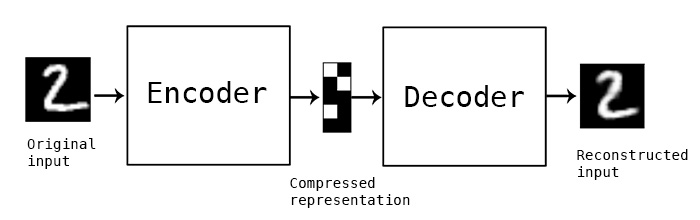

    
Por ejemplo, dada una imagen de un dígito escrito a mano, un autoencoder primero codifica la imagen en una representación latente de menor dimensión y luego decodifica la representación latente de nuevo en una imagen. Un autoencoder aprende a comprimir los datos mientras minimiza el error de reconstrucción.

A continuación se explorarán diferentes arquitecturas y usos de los autoencoder

##### a - Autoencoder básico
##### b - Denoising Autoencoder
##### c - Detección de anomalías con autoencoders

### Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.layers import Dense
from keras.models import Sequential

### Carga de datos y breve exploración

Para los ejemplos 2.a y 2.b se utilizará el dataset Fashion MNIST, el cuál puede ser obtenido desde `keras.datasets` como se muestra a continuación.

Luego, visualice algunas imágenes de cada una de las categorías junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imágenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. 


In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
label = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
indices =[]
for i in label:
    indices.append(np.asarray(y_train==i).nonzero()[0][1])

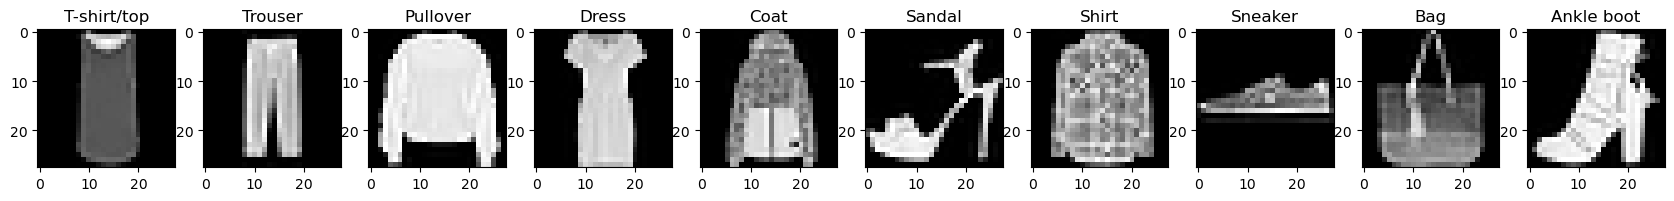

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(21, 4))
for i in range(10):
    ax[i].imshow(x_train[indices[i]], cmap='gray')
    ax[i].set_title(label[y_train[indices[i]]])

* ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? 

  Las shirt, los pullover y los coat son clases que se ven parecidas (dada la resolucion de la imagen), por lo que es esperable que la red tenga problemas al clasificarlas.

* ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

  Debido a la calidad de las imagenes mostradas, el desempeño humano seria bastante aceptable aunque la tasa de error podria ser un poco alta. Ya que como se menciono anteriormente, hay varias clases que son muy parecidas debido a la resolucion de la imagen.

## 2.a - Autoencoder básico

### Autoencoder denso

Defina un autoencoder con dos capas densas: un `codificador` (encoder) , que comprime las imágenes en un vector latente de "d" dimensiones, y un `decodificador` (decoder), que reconstruye la imagen original a partir del espacio latente.

¿A cuál función de activación debería corresponder a la capa de salida de la red? (decoder)

Para definir su modelo, use la [API de subclases de modelos de Keras](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


Pruebe tres autoencoders con d = 64, d = 324 y otro con d = dimensión original (notar que las imágenes son de 28*28)


In [ ]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim):
        
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim   
        
        self.encoder = tf.keras.Sequential([layers.Flatten(), layers.Dense(latent_dim, activation='relu')])
        
        self.decoder = tf.keras.Sequential([layers.Dense(784, activation='sigmoid'), layers.Reshape((28, 28))])

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

                                                         


Entrene el modelo con x_train como input y como target. El encoder aprenderá a comprimir el conjunto de datos de "d" dimensiones al espacio latente, y el decoder aprenderá a reconstruir las imágenes originales.

Ahora que ya están entrenados los modelos, pruebe codificando y decodificando las imágenes de test y luego grafique al menos 10  imágenes originales y sus correspondientes imágenes reconstruidas para cada "d", compare y comente. 

In [ ]:
epochs = 10

In [ ]:
l_d= [28,64,324]
encoded_imgs =[]
decoded_imgs=[]
history_dense=[]
j=0
for i in l_d:
    latent_dim = i
    autoencoder = Autoencoder(latent_dim) 
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    history_dense.append(autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test)))
    encoded_imgs.append(autoencoder.encoder(x_test).numpy())
    decoded_imgs.append(autoencoder.decoder(encoded_imgs[j]).numpy())
    j+=1

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0301 - val_loss: 0.0181
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0159 - val_loss: 0.0147
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - val_loss: 0.0140
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - val_loss: 0.0136
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

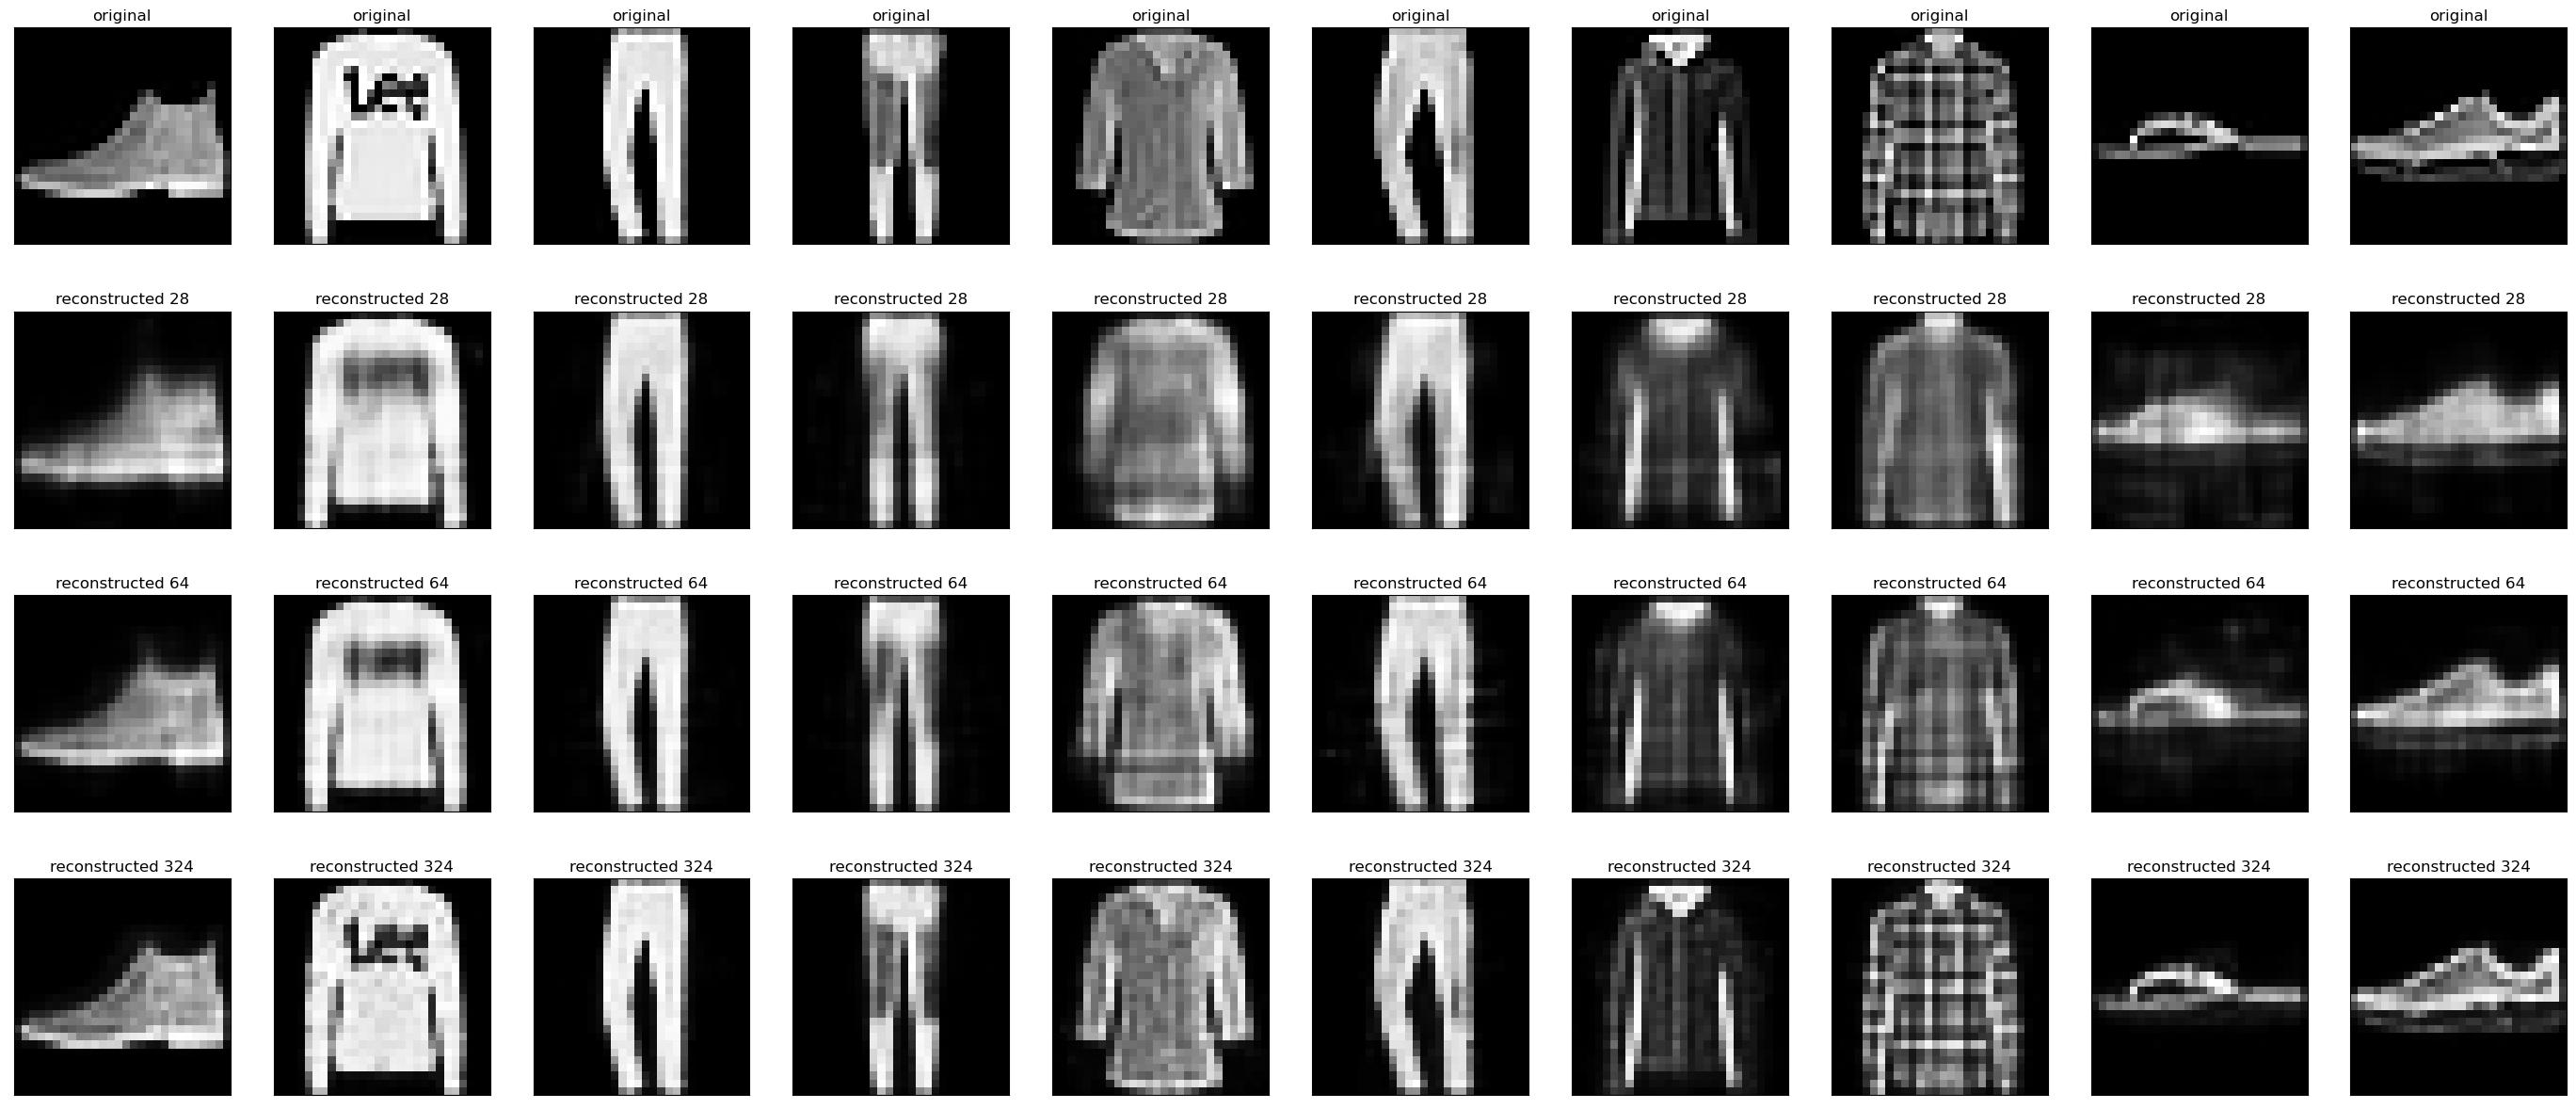

In [ ]:
n = 10
plt.figure(figsize=(35, 15))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_imgs[0][i])
    plt.title("reconstructed 28")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(4, n, i + 1 +n +n)
    plt.imshow(decoded_imgs[1][i])
    plt.title("reconstructed 64")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(4, n, i + 1 +n +n +n)
    plt.imshow(decoded_imgs[2][i])
    plt.title("reconstructed 324")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
plt.show()

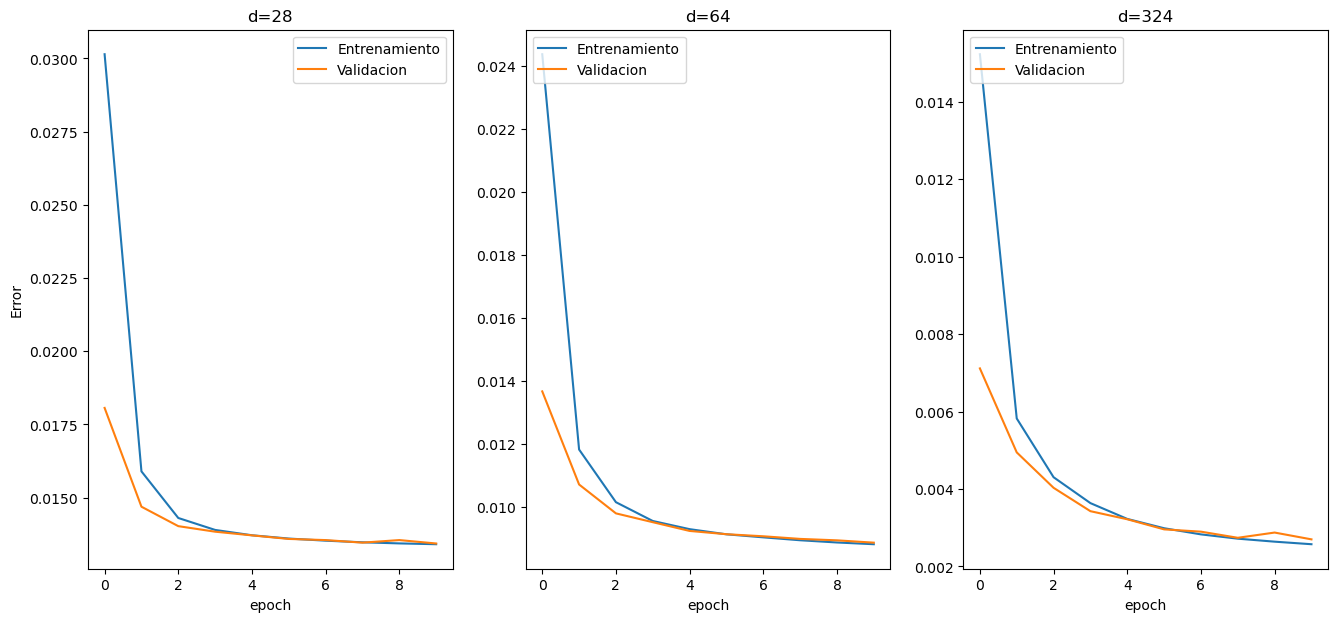

In [ ]:
title = ["d=28", "d=64", "d=324"]

fig, ax = plt.subplots(1, 3, figsize=(16,7),)

for i in range(3):
    ax[i].plot(range(epochs),   history_dense[i].history['loss'])
    ax[i].plot(range(epochs),   history_dense[i].history['val_loss'])
    #ax[1,i].plot(range(epochs),   history_dense[i].history['accuracy'], label ="Training accuracy" )
    #ax[1,i].plot(range(epochs),  history_dense[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[i].set_title(str(title[i]))
    ax[i].set_xlabel("epoch")

ax[0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0].set_ylabel('Error')
#ax[1,0].set_ylabel('Accuracy')
plt.show()

En la grafica anterior se puede ver la diferencia de rendimiento, tomando en consideración el error, en este caso, un valor $d=324$ ofrece mejores resultados que valores mejores, ya que al ser mas cercano a la dimencionalidad de la imagen original, el output resultante es mas similar ya que se consideran mas caracteristicas que con valores menores se descartarian.

### Deep Autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente d=64. 

Utilice  igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding a d=324 y compare.

#### d = 64

In [ ]:
input_img= Input(shape=(28,28))
encoded = Dense(units=128*2, activation='relu')(Flatten()(input_img)) 
encoded = Dense(units=128, activation='relu')(encoded)
encoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(encoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
decoded = tf.keras.layers.Reshape((28,28)) (decoded)
deep_autoencoder = keras.Model(input_img, decoded)
deep_autoencoder.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_65 (Dense)            (None, 256)               200960    
                                                                 
 dense_66 (Dense)            (None, 128)               32896     
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dense_69 (Dense)            (None, 784)               101

In [ ]:
history_deep =[]
deep_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_deep.append(deep_autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test)))
encoder = Model(input_img, encoded)
encoded_imgs_deep64 = encoder.predict(x_test)
decoded_imgs_deep64 = deep_autoencoder.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0224 - val_loss: 0.0150
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
313/313 [==============================] - 2s 4ms/step


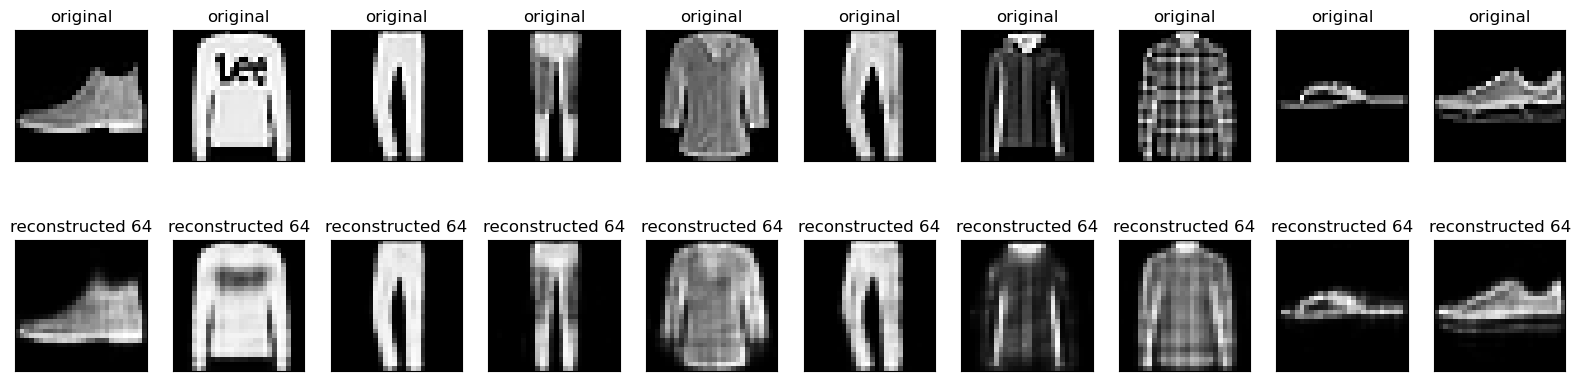

In [ ]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_deep64[i])
    plt.title("reconstructed 64")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    
plt.show()

#### d= 324

In [ ]:
input_img= Input(shape=(28,28))
encoded = Dense(units=128*2, activation='relu')(Flatten()(input_img)) 
encoded = Dense(units=128, activation='relu')(encoded)
encoded = Dense(units=324, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(encoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
decoded = tf.keras.layers.Reshape((28,28)) (decoded)
deep_autoencoder = keras.Model(input_img, decoded)
deep_autoencoder.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               200960    
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 dense_72 (Dense)            (None, 324)               41796     
                                                                 
 dense_73 (Dense)            (None, 128)               41600     
                                                                 
 dense_74 (Dense)            (None, 784)               101

In [ ]:
deep_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_deep.append(deep_autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test)))
encoder = Model(input_img, encoded)
encoded_imgs_deep324 = encoder.predict(x_test)
decoded_imgs_deep324 = deep_autoencoder.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0216 - val_loss: 0.0142
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0126 - val_loss: 0.0113
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


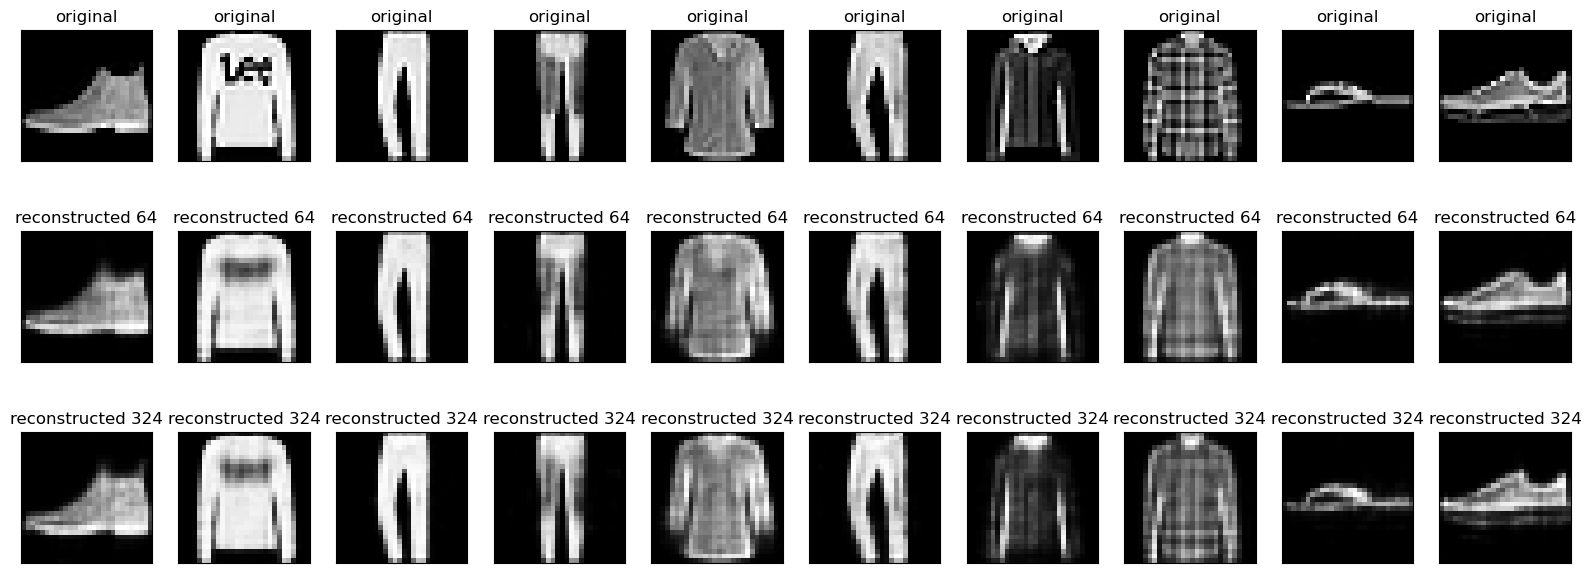

In [ ]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_imgs_deep64[i])
    plt.title("reconstructed 64")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
     # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n+n)
    plt.imshow(decoded_imgs_deep324[i])
    plt.title("reconstructed 324")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
plt.show()

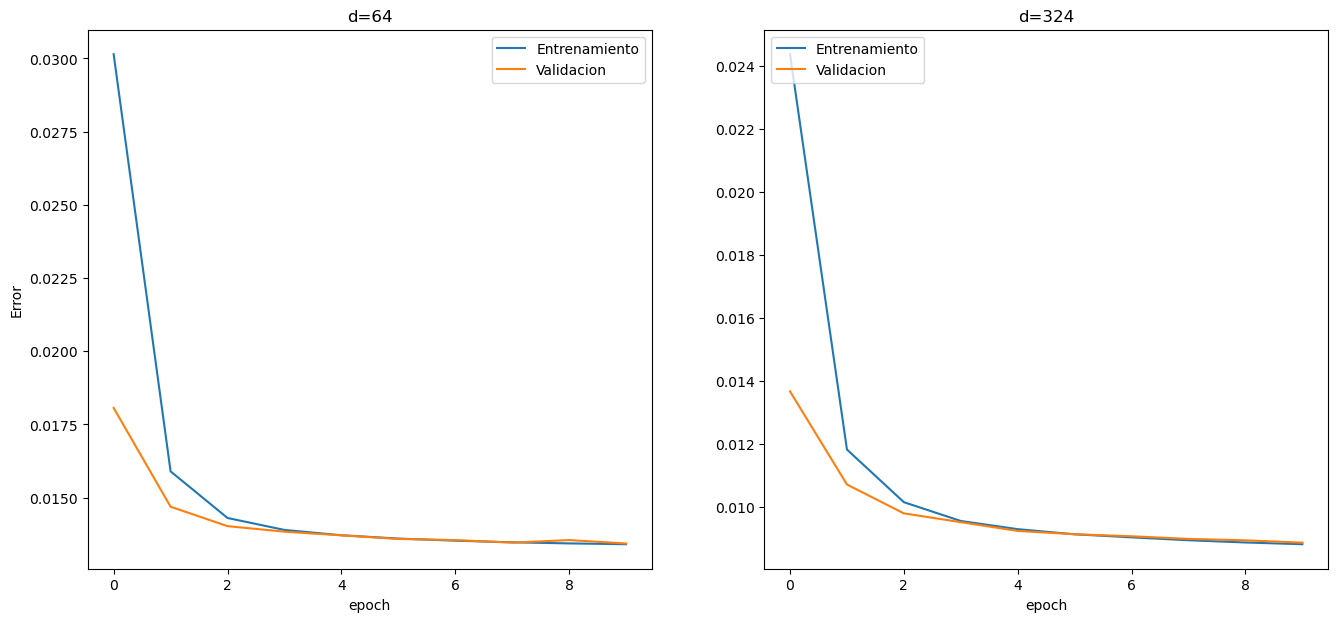

In [ ]:
title = ["d=64",  "d=324"]

fig, ax = plt.subplots(1, 2, figsize=(16,7),)

for i in range(2):
    ax[i].plot(range(epochs),   history_dense[i].history['loss'])
    ax[i].plot(range(epochs),   history_dense[i].history['val_loss'])
    #ax[1,i].plot(range(epochs),   history_dense[i].history['accuracy'], label ="Training accuracy" )
    #ax[1,i].plot(range(epochs),  history_dense[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[i].set_title(str(title[i]))
    ax[i].set_xlabel("epoch")

ax[0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0].set_ylabel('Error')
#ax[1,0].set_ylabel('Accuracy')
plt.show()

Esta variante ofrece peores resultados que la mostrada en graficos anteriores, en las anteriores se obtenia valores de error de $0.001$ aproximadamente. Mientras que ahora tenemos valores 10 veces mas grandes que lo anterior, si bien esto no tiene un impacto visible, ya que estamos alrededor del $1\%$ de error.

#### Autoencoder Convolucional

Defina ahora, un autoencoder convolucional. La sección de encoding de la red se creará de igual manera queconvolucional cualquier red convolucional. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Ponga atención a como varía la dimensión de la imagen a lo largo del proceso, recuerde que se quiere comprimir y descomprimir la imagen. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada `Deconvolution` o [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) . 
Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 


¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imágenes reconstruidas. Luego compare su resultado con la red densa.

Observe cómo se reducen las muestras de las imágenes utilizando  `.summary()` en el encoder y cómo se amplian en el decoder

In [ ]:
class ConvAutoencoder(Model):
    
    def __init__(self):
        
        super(ConvAutoencoder, self).__init__()

        self.encoder = tf.keras.Sequential([
              layers.Input(shape=(28, 28, 1)),
              layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
              layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])
        
        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded


In [ ]:
autoencoder = ConvAutoencoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_conv = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs_conv = autoencoder.encoder.predict(x_test)
decoded_imgs_conv = autoencoder.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0124 - val_loss: 0.0047
Epoch 2/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 6/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/10
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/10
313/313 [==============================] - 2

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_10 (Conv2D  (None, 14, 14, 8)        584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 28, 28, 16)       1168      
 Transpose)                                                      
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


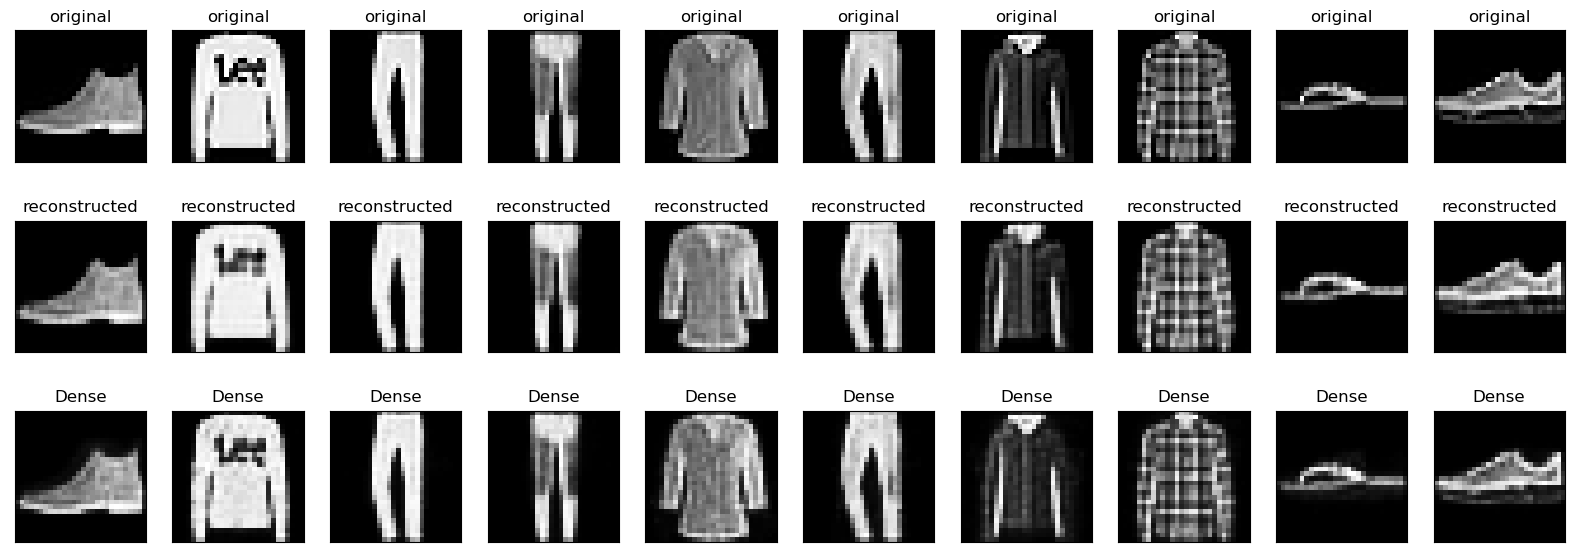

In [ ]:
n = 10
plt.figure(figsize=(20, 7))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_conv[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n +n)
    plt.imshow(decoded_imgs[2][i])
    plt.title("Dense")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
    #decoded_imgs_deep324[i]


plt.show()

De la gráfica se ve que se obtiene mejor resultado al obtener la forma de la imagen con la convolucional, sin embargo, las diferencias entre ambas no son muy notorias

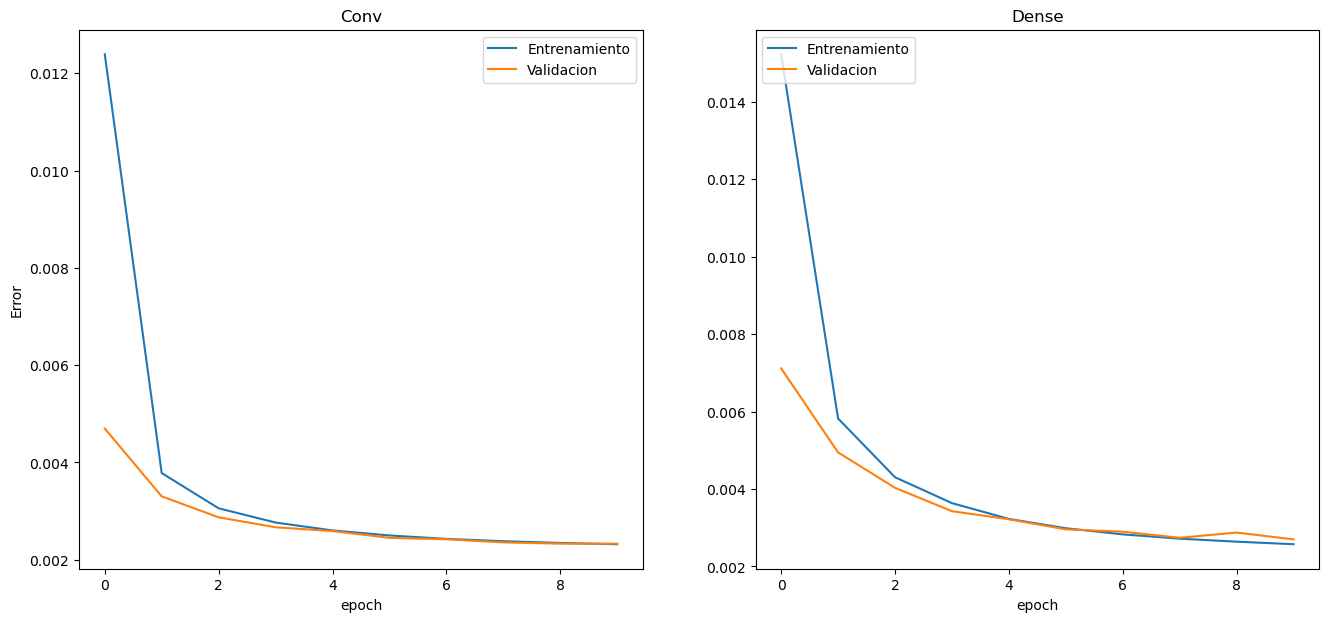

In [ ]:
title = ["Conv", "Dense"]

fig, ax = plt.subplots(1, 2, figsize=(16,7),)

i=0
ax[i].plot(range(epochs),  history_conv.history['loss'])
ax[i].plot(range(epochs),   history_conv.history['val_loss'])
ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[i].set_title(str(title[i]))
ax[i].set_xlabel("epoch")

i=1
ax[i].plot(range(epochs),  history_dense[i+1].history['loss'])
ax[i].plot(range(epochs),   history_dense[i+1].history['val_loss'])
ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
ax[i].set_title(str(title[i]))
ax[i].set_xlabel("epoch")

ax[0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0].set_ylabel('Error')
plt.show()

En la grafica anterior, donde se compara una version convolucional y una dense, no se aprecian diferencias significativas en el valor de error.

## 2.b - Denoising autoencoder  

Otro uso bastante utilizado de los autoencoders, es la eliminación de ruido en las imágenes, esta tarea es de gran utilidad en campos como la medicina y astronomía.

A continuación podemos ver 3 resultados de denoising utilizando deep autoencoders.

<center>
    
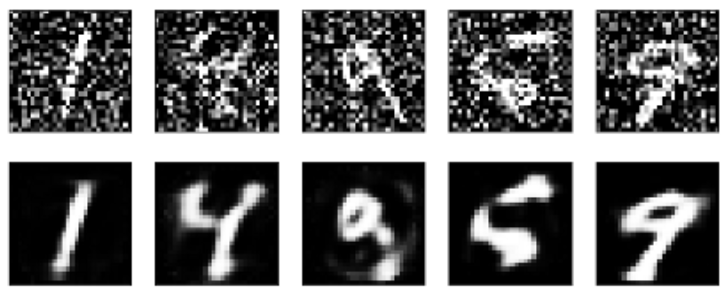
    
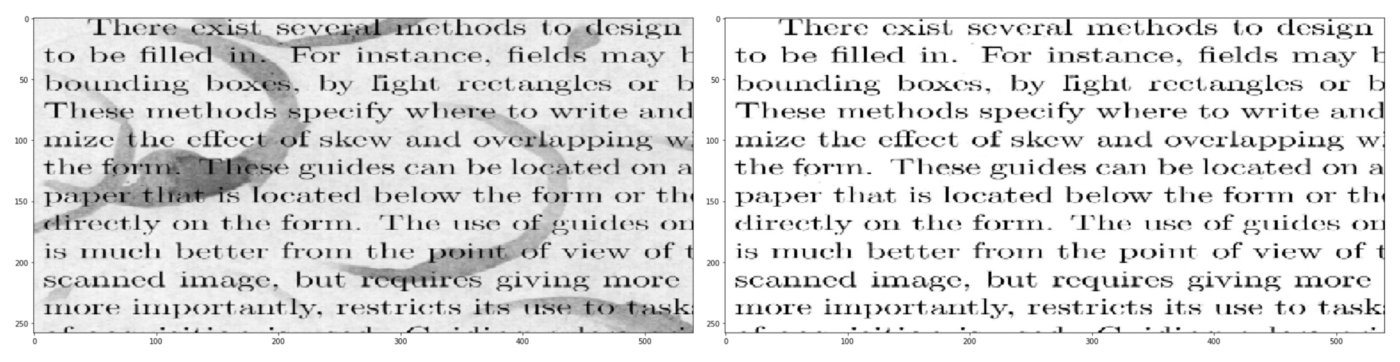

<img src="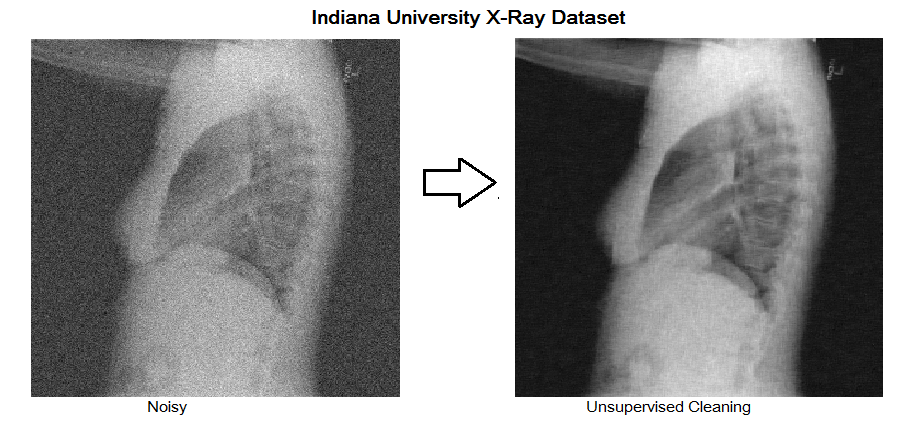 ">
<center>

Para entrenar un denoising autoencoder, la idea es similar a los modelos recién explorados, la diferencia es que en lugar de utilizar  las imágenes entregadas como datos de entrada y target, estás son utilizadas como target solamente, mientras que los datos de entrada serán imágenes pre-procesadas a las que se agrega ruido de forma artificial.

Cree una versión ruidosa del conjunto de datos Fashion MNIST agregandole ruido aleatorio a cada imagen. Puede utilizar las librerías random de numpy o tensorflow (o cualquier herramienta que encuentre útil). Además puede cargar el dataset nuevamente si lo modificó anteriormente.

Luego cree y entrene un autoencoder convolucional utilizando las imágenes ruidosas como entrada y la imagen original como objetivo.



In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

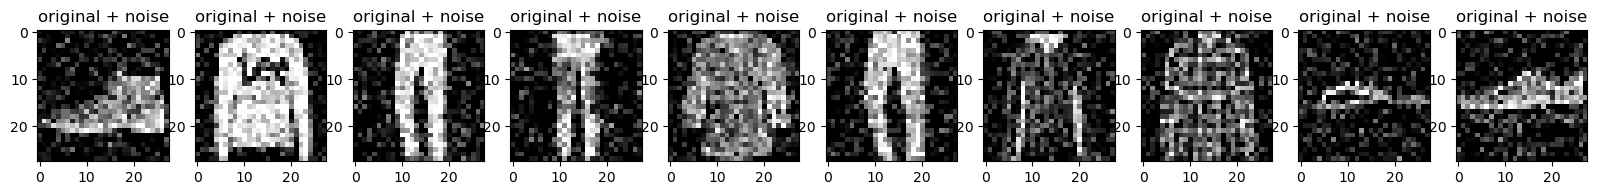

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

Ahora defina y entrene el denoising autoencoder con alguna estructura apropiada.

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida.

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])
        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

denoising_autoencoder = Denoise()

In [ ]:
denoising_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 175s 91ms/step - loss: 0.0182 - val_loss: 0.0109
Epoch 2/10
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 3/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 4/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 5/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 6/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 7/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 8/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 9/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 10/10
1875/1875 [==============================] 

In [ ]:
encoded_imgs_noise = denoising_autoencoder.encoder(x_test).numpy()
decoded_imgs_noise = denoising_autoencoder.decoder(encoded_imgs_noise).numpy()

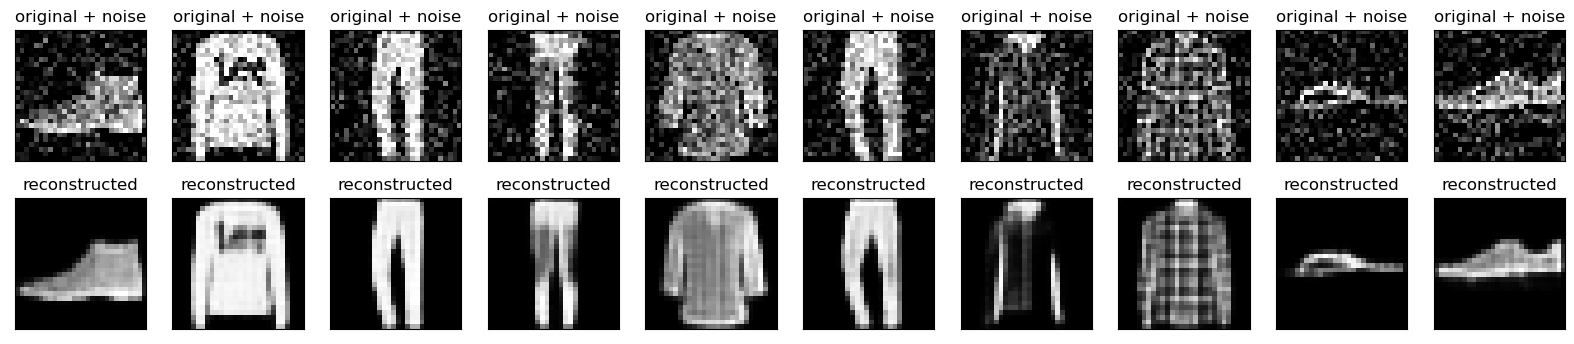

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs_noise[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

Se puede observar en el gráfico, como se elimina el ruido de las imagenes modificadas, permitiendo resaltar la forma de cada elemento

## 2.c Detección de anomalías

Otra utilidad de los autoencoder recae en la detección de anomalías. En este caso se entrenará un autoencoder para detectar anomalías en ECG (Electrocardiogramas). 

Se utilizará una versión simplificada de [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000), la cuál contiene 140 electrocardiogramas en dónde cada uno de estos cuenta con 140 puntos y se consideran las etiquetas `0` si es un ECG anómalo y `1` si es normal.

Nota: este es un conjunto de datos etiquetado, por lo que podría expresarlo como un problema de aprendizaje supervisado. El objetivo de este ejemplo es ilustrar los conceptos de detección de anomalías que puede aplicar a conjuntos de datos más grandes, donde no tiene etiquetas disponibles (por ejemplo, si tiene muchos miles de ritmos normales y solo una pequeña cantidad de ritmos anormales).

¿Cómo se detecta anomalías utilizando un autoencoder? 
Recuerde que un codificador automático está entrenado para minimizar el error de reconstrucción, por lo que se entrenará un autoencoder solo en los ritmos normales, luego lo usará para reconstruir todos los datos. 
Es por esto que los ritmos anormales tendrán un mayor error de reconstrucción, por lo que se clasificará un ritmo como anómalo si el error de reconstrucción supera un umbral fijo.


### Carga de datos

In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

Normalice la data en `[0,1]`, luego separe la data normal de la anormal de acuerdo a su etiqueta.

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Grafique un ECG normal y uno anormal.

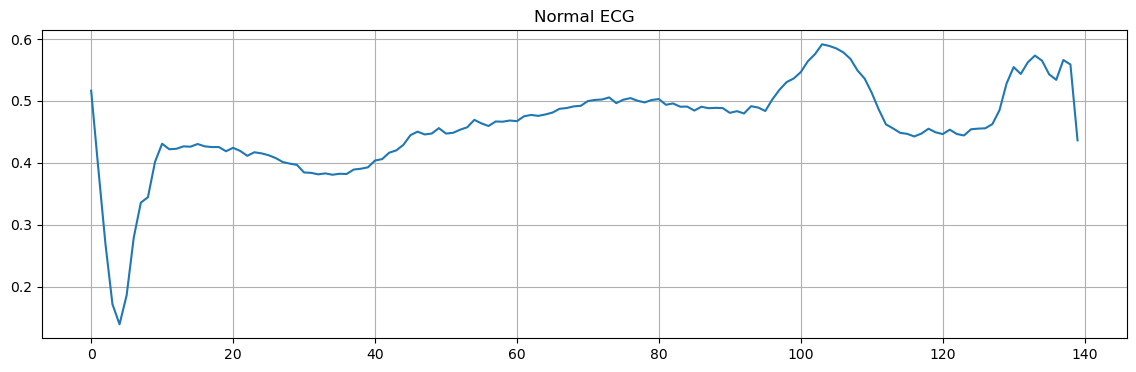

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("Normal ECG")
plt.show()

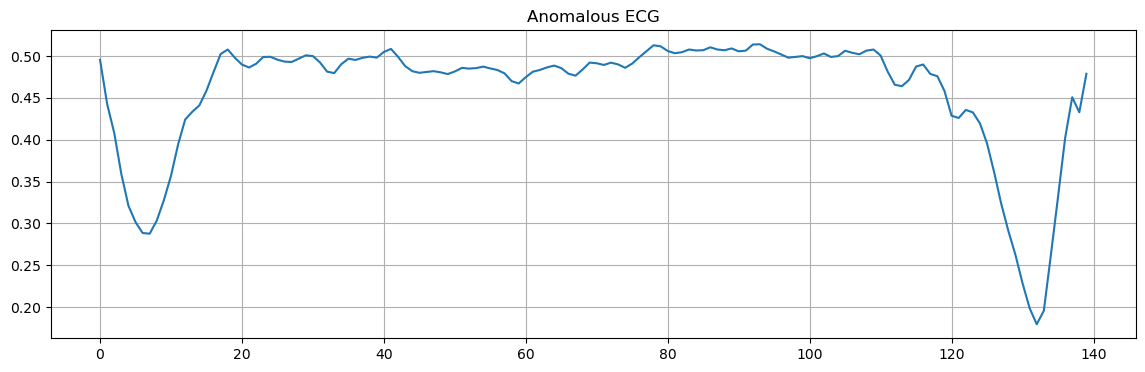

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("Anomalous ECG")
plt.show()

#### Modelo

Defina, compile y entrene un autoencoder denso para la detección de anomalías, puede ser uno ya creado anteriormente o uno nuevo.

Recuerde que el autoencoder debe ser entrenado usando solo los ECGs normales, pero debe ser validado en todo el test set.

Luego grafique la loss de entrenamiento y de validación en un mismo gráfico.

In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])
    
        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=epochs, 
          batch_size=batch_size,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/10
73/73 [==============================] - 4s 9ms/step - loss: 0.0374 - val_loss: 0.0357
Epoch 2/10
73/73 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.0337
Epoch 3/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.0323
Epoch 4/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0315
Epoch 5/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0195 - val_loss: 0.0302
Epoch 6/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.0296
Epoch 7/10
73/73 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0281
Epoch 8/10
73/73 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.0286
Epoch 9/10
73/73 [==============================] - 0s 6ms/step - loss: 0.0165 - val_loss: 0.0288
Epoch 10/10
73/73 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0287


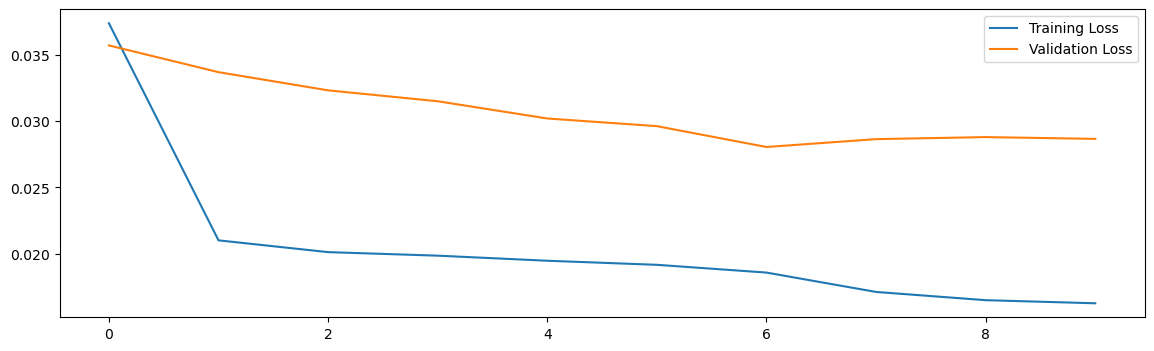

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Se puede observar en el gráfico un menor error en el data de entrenamiento, pues este solo fue entrenado con datos de ECG normal, mientras que en la validación se tiene un mayor error, pues aquí se está agregando data de ECG anormales

Se clasificará un ECG como anómalo si el error de reconstrucción es mayor que una desviación estándar de los ejemplos de entrenamiento normales. 

Primero, trazaremos un ECG normal del conjunto de entrenamiento, la reconstrucción después de que el autoencoder lo codifique y decodifique, y el error de reconstrucción.

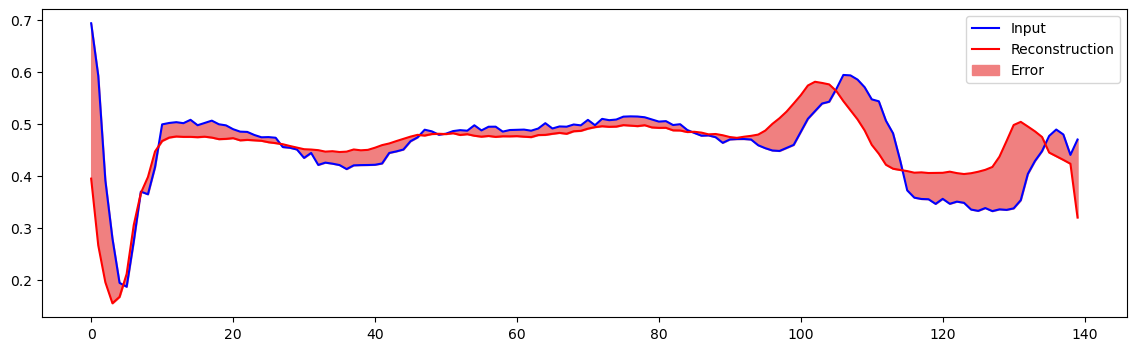

In [ ]:
#run
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Ahora cree un gráfico similar  pero para un ejemplo anómalo del test

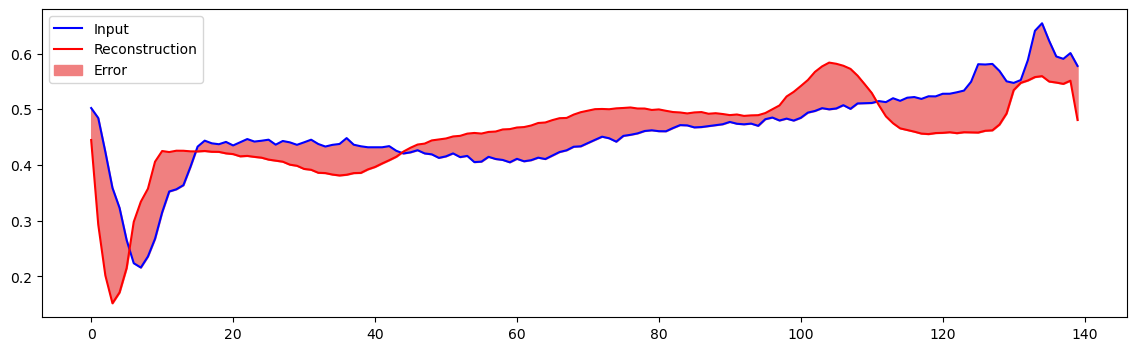

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Se puede observar que la reconstrucción de la data normal tiene un error menor a la data de un ECG normal, lo cual permite detectar anomalías a través del error, lo que se verá en el punto siguiente

### Detectar anomalías

Ahora detectará anomalías calculando si la loss de reconstrucción es mayor que un umbral fijo. 

En este caso deberá calcular el error promedio para ejemplos normales del conjunto de entrenamiento, luego clasificar ejemplos futuros como anómalos si el error de reconstrucción es mayor que una desviación estándar del conjunto de entrenamiento.

A continuación grafique el error de reconstrucción en un ECG normal del set de entrenamiento

73/73 [==============================] - 0s 2ms/step


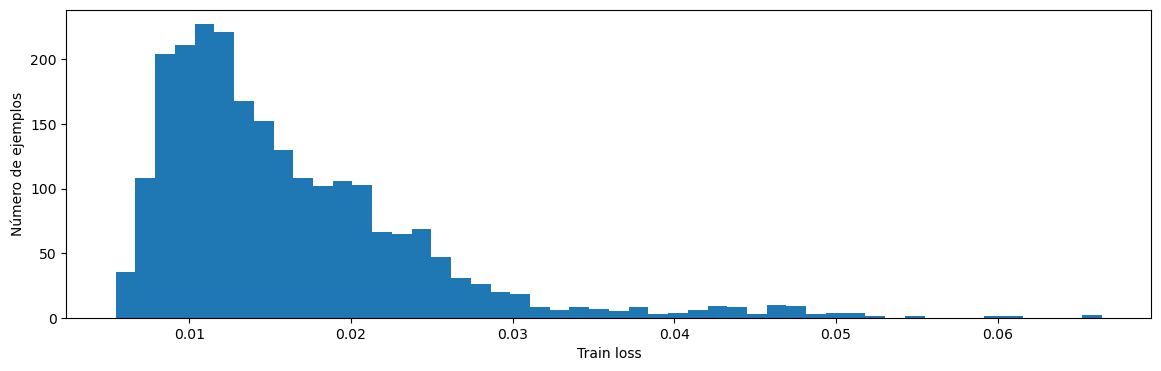

In [ ]:
#run 
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)


plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("Número de ejemplos")
plt.show()

Se puede observar que para la data de entrenamiento, los valores de los errores están centrados hacia la izquierda

Defina el valor del umbral como una desviacion estandar arriba de la media de la train_loss, puede utilizar `np.mean` y `np.std`

Nota: Este es solo un ejemplo de elección de umbral, existen otras estrategias para elegirlo, la elección del enfoque dependerá del dataset.

In [ ]:
umbral= np.mean(train_loss) + np.std(train_loss)
print("Umbral: ", umbral)

Umbral:  0.024331603


Examine el error de reconstrucción de los ejemplos anómalos del test set. Para esto visualice un gráfico similar al del error de reconstrucción en un ECG normal del set de entrenamiento, pero esta vez con los ejemplos anómalos del set de testeo.

¿Qué puede concluir sobre el error de reconstrucción de la mayoría del test set y el umbral?

13/13 [==============================] - 0s 4ms/step


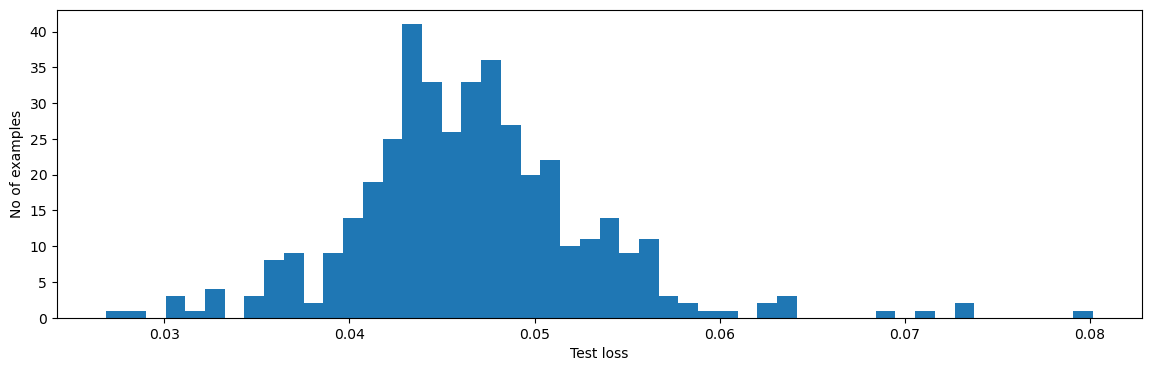

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Se puede observar en el gráfico que los errores en el testo se desplazan hacia el centro, pues se están considerando los datos de ECG anómalo que deben tener un error grande para ser detectados como anómalos.

Defina la función predict para clasificar un ECG como anómalo si el error de reconstrucción es mayor que el umbral, puede utilizar `tf.math.less` para retornar un Tensor de booleanos. 

Luego utilice esta función para predecir y muestre el accuracy, la presición y el recall del detector.

In [ ]:
def predict(autoencoder, data, umbral):
    reconstructions = autoencoder(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, umbral)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))
    
preds = predict(autoencoder, test_data, umbral)
print_stats(preds, test_labels)

Accuracy = 0.935
Precision = 1.0
Recall = 0.8900169204737732


Si quisieran explorar un poco más el problema, en [anomagram](https://anomagram.fastforwardlabs.com/#/) pueden ver una herramienta de visualización interactiva para explorar cómo se puede aplicar un autoencoder a la tarea de detección de anomalías, pueden dibujar su propio ECG y se predice en tiempo real si es normal o anormal, además pueden explorar como la elección del umbral impacta en la precisión y recall.